Danielle Paes Barretto

**LAST VERSION: 05-06-19**

In this notebook the logit will be made for all categories.

The order of the categories in this notebook is given by the order of their mean track popularity (descending).

It will checked for duplicates in 'current_track-next_track' and the duplicates will be eliminated in order to keep 'is_good_sequence' = 1.

Duplicates happened in the larger categories (categories: chill, classical, latin, mood, and roots) because it was necessary split the file with track info in order to be able to generate the one with all possible differences .

Therefore, it is necessary to eliminate the duplicates being careful to keep the ones in which 'is_good_sequence' = 1. For this I'll eliminate the copies in which 'is_good_sequence' = 0, because if there is a current_track-next_track with 'is_good_sequence' = 1 it means that this sequence is present in the category and eliminating this one would make the results in the logistic regression to be wrong.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import statsmodels.formula.api as smf

import time
TodaysDate = time.strftime("%Y-%m-%d")

# Folders

In [2]:
input_folder = "D:/DATA_02062019/PREVIOUS_DATA/diff_tracks_050619/"
images_folder = "D:/DATA_02062019/PREVIOUS_DATA/logit_img/"

# Category Afro:

## Loading data

In [3]:
file = "df_diff_category_afro_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [4]:
category = file.split('.')[-2].split('_')[-2]
category

'afro'

## Eliminating duplicates in case they exist

In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11692980 entries, 0 to 11692979
Data columns (total 13 columns):
current_track-next_track    11692980 non-null object
diff_acousticness           11692980 non-null float64
diff_danceability           11692980 non-null float64
diff_energy                 11692980 non-null float64
diff_valence                11692980 non-null float64
diff_tempo                  11692980 non-null float64
diff_instrumentalness       11692980 non-null float64
diff_key                    11692980 non-null float64
diff_mode                   11692980 non-null float64
diff_liveness               11692980 non-null float64
diff_loudness               11692980 non-null float64
diff_speechiness            11692980 non-null float64
is_good_sequence            11692980 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.1+ GB


In [6]:
# check for duplicates

len(df['current_track-next_track'].unique())

11692980

In [7]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    11689561
1        3419
Name: is_good_sequence, dtype: int64

In [8]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [9]:
df['is_good_sequence'].value_counts()

0    11689561
1        3419
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [10]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       1.169298e+07       1.169298e+07  1.169298e+07  1.169298e+07   
mean        2.929619e-01       1.563905e-01  2.073067e-01  2.512424e-01   
std         2.345933e-01       1.182178e-01  1.615329e-01  1.912289e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         9.700000e-02       6.200000e-02  8.000000e-02  9.500000e-02   
50%         2.350000e-01       1.320000e-01  1.710000e-01  2.100000e-01   
75%         4.444600e-01       2.270000e-01  2.980000e-01  3.710000e-01   
max         9.890000e-01       9.740000e-01  9.846000e-01  9.870000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  1.169298e+07           1.169298e+07  1.169298e+07  1.169298e+07   
mean   2.768190e+01           1.423722e-01  4.121490e+00  4.886725e-01   
std    2.354964e+01           2.603999e-01  2.968512e+00  4.998717e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.930000e+00           3.300000e-05  2.000000e+00  0.000000e+00   
50%    2.143400e+01           3.080000e-03  4.000000e+00  0.000000e+00   
75%    3.889600e+01           1.320000e-01  6.000000e+00  1.000000e+00   
max    2.201670e+02           9.660000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   1.169298e+07   1.169298e+07      1.169298e+07      1.169298e+07  
mean    1.338829e-01   3.943741e+00      9.201766e-02      2.923977e-04  
std     1.538837e-01   3.424632e+00      9.934704e-02      1.709714e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     2.950000e-02   1.424000e+00      1.820000e-02      0.000000e+00  
50%     7.500000e-02   3.081000e+00      5.280000e-02      0.000000e+00  
75%     1.910000e-01   5.522000e+00      1.390000e-01      0.000000e+00  
max     9.980000e-01   4.957800e+01      9.360000e-01      1.000000e+00

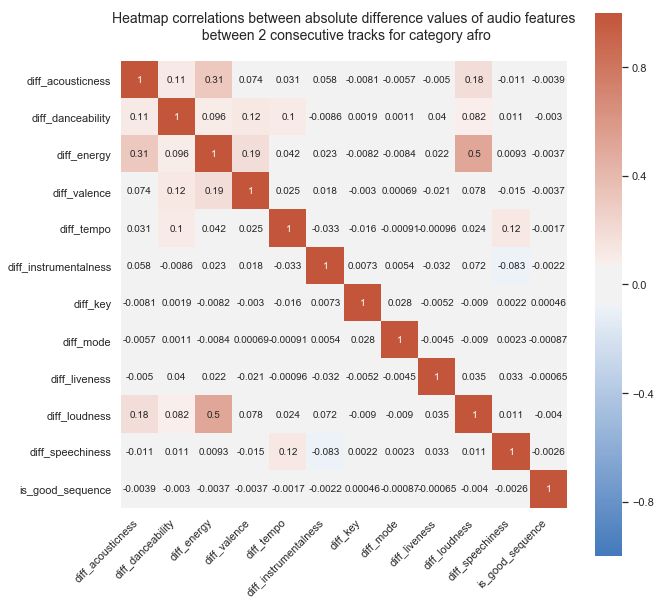

In [11]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [12]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.002640
         Iterations 13


## Summary Logit

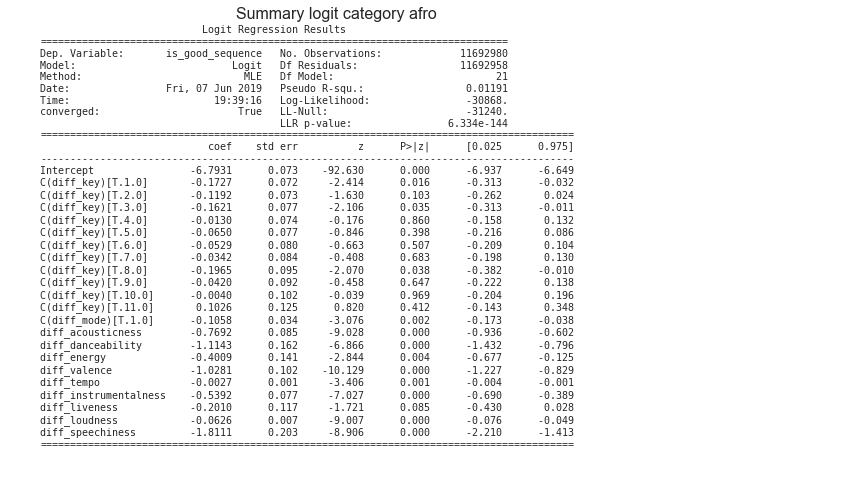

In [13]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

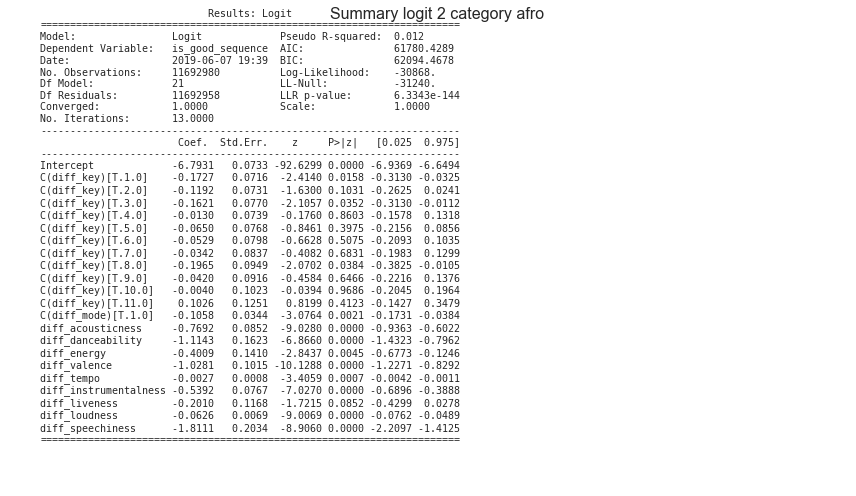

In [14]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [15]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.001121  0.000000e+00  0.000971  0.001295         True
C(key)[T.1.0]     0.841365  1.577894e-02  0.731269  0.968035         True
C(key)[T.2.0]     0.887648  1.030967e-01  0.769140  1.024417        False
C(key)[T.3.0]     0.850346  3.523282e-02  0.731245  0.988845         True
C(key)[T.4.0]     0.987080  8.603032e-01  0.853993  1.140907        False
C(key)[T.5.0]     0.937054  3.975057e-01  0.806042  1.089361        False
C(key)[T.6.0]     0.948482  5.074717e-01  0.811147  1.109069        False
C(key)[T.7.0]     0.966393  6.830968e-01  0.820120  1.138755        False
C(key)[T.8.0]     0.821629  3.843352e-02  0.682173  0.989593         True
C(key)[T.9.0]     0.958873  6.466488e-01  0.801275  1.147469        False
C(key)[T.10.0]    0.995979  9.685720e-01  0.815083  1.217022        False
C(key)[T.11.0]    1.108063  4.122526e-01  0.867038  1.416091        False
C(mode)[T.1.0]    0.899638  2.095071e-03  0.841017  0.962345         True
acousticness      0.463362  1.749079e-19  0.392095  0.547581         True
danceability      0.328159  6.602697e-12  0.238752  0.451048         True
energy            0.669697  4.458986e-03  0.508006  0.882851         True
valence           0.357679  4.117850e-24  0.293151  0.436409         True
tempo             0.997350  6.594844e-04  0.995828  0.998874         True
instrumentalness  0.583220  2.109763e-12  0.501786  0.677869         True
liveness          0.817898  8.516089e-02  0.650587  1.028237        False
loudness          0.939360  2.119886e-19  0.926659  0.952234         True
speechiness       0.163473  5.288331e-19  0.109736  0.243525         True

# Category Alt:

## Loading data

In [16]:
file = "df_diff_category_alt_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [17]:
category = file.split('.')[-2].split('_')[-2]
category

'alt'

## Eliminating duplicates in case they exist

In [18]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378130 entries, 0 to 8378129
Data columns (total 13 columns):
current_track-next_track    8378130 non-null object
diff_acousticness           8378130 non-null float64
diff_danceability           8378130 non-null float64
diff_energy                 8378130 non-null float64
diff_valence                8378130 non-null float64
diff_tempo                  8378130 non-null float64
diff_instrumentalness       8378130 non-null float64
diff_key                    8378130 non-null float64
diff_mode                   8378130 non-null float64
diff_liveness               8378130 non-null float64
diff_loudness               8378130 non-null float64
diff_speechiness            8378130 non-null float64
is_good_sequence            8378130 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 831.0+ MB


In [19]:
# check for duplicates

len(df['current_track-next_track'].unique())

8378130

In [20]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    8375236
1       2894
Name: is_good_sequence, dtype: int64

In [21]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [22]:
df['is_good_sequence'].value_counts()

0    8375236
1       2894
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [23]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       8.378130e+06       8.378130e+06  8.378130e+06  8.378130e+06   
mean        2.978135e-01       1.749580e-01  2.370592e-01  2.744341e-01   
std         2.795920e-01       1.305557e-01  1.782866e-01  1.964358e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         5.200000e-02       7.000000e-02  9.300000e-02  1.130000e-01   
50%         2.074400e-01       1.490000e-01  2.000000e-01  2.390000e-01   
75%         4.973500e-01       2.530000e-01  3.460000e-01  4.020000e-01   
max         9.919986e-01       9.098000e-01  9.906100e-01  9.459000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  8.378130e+06           8.378130e+06  8.378130e+06  8.378130e+06   
mean   3.136714e+01           2.221493e-01  4.133552e+00  4.259781e-01   
std    2.351679e+01           2.915826e-01  2.977952e+00  4.944904e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.246700e+01           1.570000e-03  2.000000e+00  0.000000e+00   
50%    2.658400e+01           5.450000e-02  4.000000e+00  0.000000e+00   
75%    4.541700e+01           3.989431e-01  6.000000e+00  1.000000e+00   
max    1.487550e+02           9.910000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   8.378130e+06   8.378130e+06      8.378130e+06      8.378130e+06  
mean    1.323258e-01   3.479391e+00      3.453903e-02      3.454231e-04  
std     1.493863e-01   3.152343e+00      5.453527e-02      1.858235e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     2.740000e-02   1.213000e+00      6.100000e-03      0.000000e+00  
50%     7.300000e-02   2.637000e+00      1.550000e-02      0.000000e+00  
75%     1.920000e-01   4.809000e+00      3.840000e-02      0.000000e+00  
max     9.564000e-01   3.379800e+01      5.478000e-01      1.000000e+00

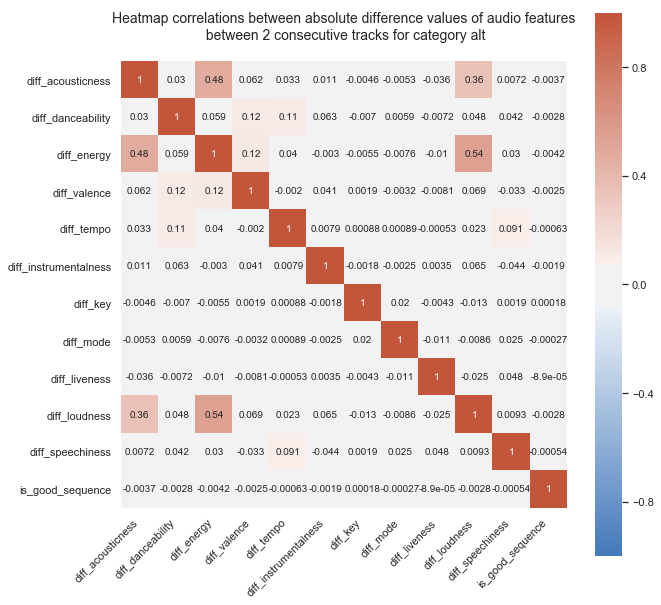

In [24]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [25]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.003080
         Iterations 12


## Summary Logit

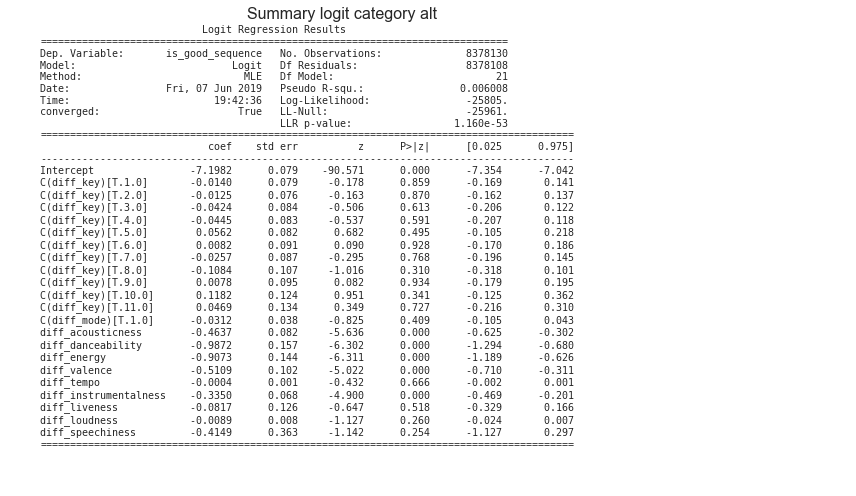

In [26]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

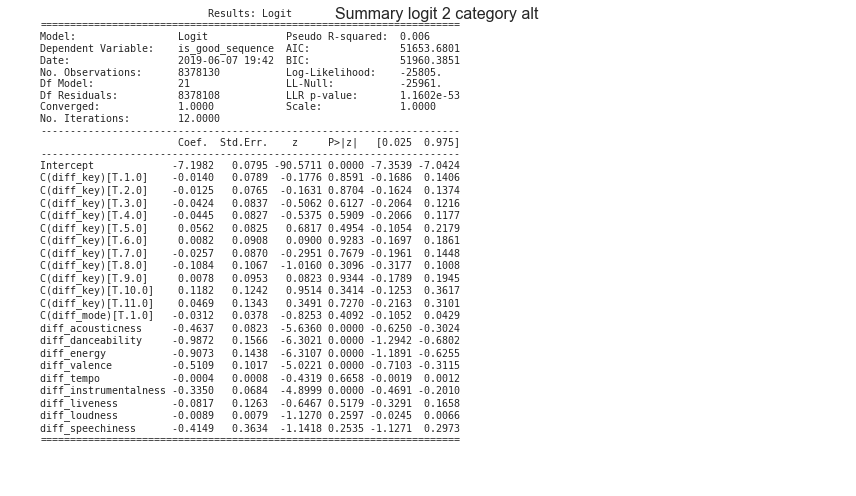

In [27]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [28]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.000748  0.000000e+00  0.000640  0.000874         True
C(key)[T.1.0]     0.986093  8.590731e-01  0.844849  1.150951        False
C(key)[T.2.0]     0.987601  8.704078e-01  0.850127  1.147306        False
C(key)[T.3.0]     0.958529  6.127290e-01  0.813542  1.129355        False
C(key)[T.4.0]     0.956506  5.909247e-01  0.813330  1.124887        False
C(key)[T.5.0]     1.057831  4.954470e-01  0.899940  1.243422        False
C(key)[T.6.0]     1.008201  9.282981e-01  0.843895  1.204497        False
C(key)[T.7.0]     0.974665  7.679007e-01  0.821946  1.155761        False
C(key)[T.8.0]     0.897225  3.096271e-01  0.727853  1.106010        False
C(key)[T.9.0]     1.007867  9.344391e-01  0.836212  1.214760        False
C(key)[T.10.0]    1.125460  3.413974e-01  0.882240  1.435730        False
C(key)[T.11.0]    1.047992  7.270419e-01  0.805469  1.363538        False
C(mode)[T.1.0]    0.969304  4.091918e-01  0.900129  1.043795        False
acousticness      0.628951  1.740937e-08  0.535284  0.739010         True
danceability      0.372635  2.935846e-10  0.274127  0.506540         True
energy            0.403612  2.777585e-10  0.304499  0.534987         True
valence           0.599967  5.111592e-07  0.491515  0.732348         True
tempo             0.999649  6.658395e-01  0.998059  1.001242        False
instrumentalness  0.715304  9.589421e-07  0.625586  0.817890         True
liveness          0.921589  5.178546e-01  0.719535  1.180381        False
loudness          0.991108  2.597391e-01  0.975832  1.006623        False
speechiness       0.660402  2.535224e-01  0.323973  1.346195        False

# Category Arab:

## Loading data

In [29]:
file = "df_diff_category_arab_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [30]:
category = file.split('.')[-2].split('_')[-2]
category

'arab'

## Eliminating duplicates in case they exist

In [31]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124306 entries, 0 to 2124305
Data columns (total 13 columns):
current_track-next_track    2124306 non-null object
diff_acousticness           2124306 non-null float64
diff_danceability           2124306 non-null float64
diff_energy                 2124306 non-null float64
diff_valence                2124306 non-null float64
diff_tempo                  2124306 non-null float64
diff_instrumentalness       2124306 non-null float64
diff_key                    2124306 non-null float64
diff_mode                   2124306 non-null float64
diff_liveness               2124306 non-null float64
diff_loudness               2124306 non-null float64
diff_speechiness            2124306 non-null float64
is_good_sequence            2124306 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 210.7+ MB


In [32]:
# check for duplicates

len(df['current_track-next_track'].unique())

2124306

In [33]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    2122849
1       1457
Name: is_good_sequence, dtype: int64

In [34]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [35]:
df['is_good_sequence'].value_counts()

0    2122849
1       1457
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [36]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       2.124306e+06       2.124306e+06  2.124306e+06  2.124306e+06   
mean        3.052047e-01       1.697387e-01  2.172273e-01  2.670491e-01   
std         2.333200e-01       1.274430e-01  1.743535e-01  2.001222e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.100000e-01       6.700000e-02  8.100000e-02  1.040000e-01   
50%         2.545000e-01       1.430000e-01  1.750000e-01  2.240000e-01   
75%         4.581000e-01       2.480000e-01  3.100000e-01  3.920000e-01   
max         9.939983e-01       8.550000e-01  9.892500e-01  9.481000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  2.124306e+06           2.124306e+06  2.124306e+06  2.124306e+06   
mean   3.312583e+01           1.557826e-01  4.152353e+00  4.844321e-01   
std    2.530197e+01           3.020352e-01  2.979635e+00  4.997577e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.218600e+01           3.710000e-06  2.000000e+00  0.000000e+00   
50%    2.760100e+01           3.520000e-04  4.000000e+00  0.000000e+00   
75%    4.921200e+01           7.020000e-02  6.000000e+00  1.000000e+00   
max    1.546270e+02           9.770000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   2.124306e+06   2.124306e+06      2.124306e+06      2.124306e+06  
mean    1.529697e-01   3.924215e+00      8.682458e-02      6.858711e-04  
std     1.725935e-01   3.826746e+00      9.591493e-02      2.618016e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     3.400000e-02   1.296000e+00      1.750000e-02      0.000000e+00  
50%     9.010000e-02   2.844000e+00      4.900000e-02      0.000000e+00  
75%     2.140000e-01   5.322000e+00      1.250000e-01      0.000000e+00  
max     9.565000e-01   4.475100e+01      6.963000e-01      1.000000e+00

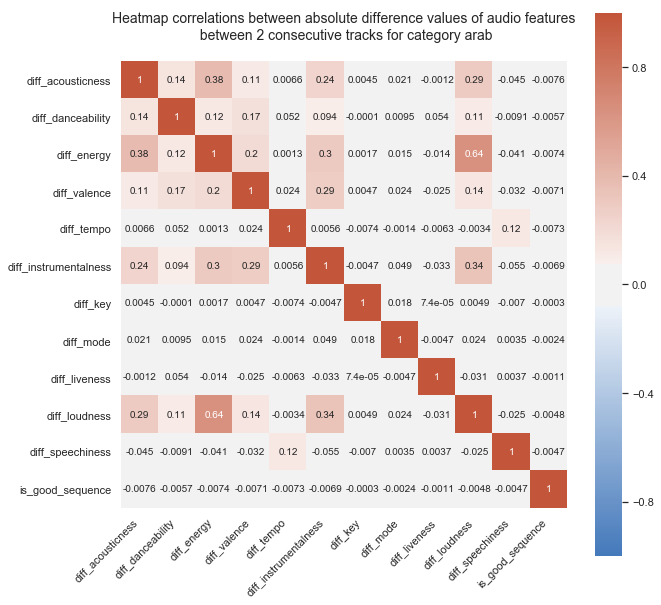

In [37]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [38]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.005558
         Iterations 12


## Summary Logit

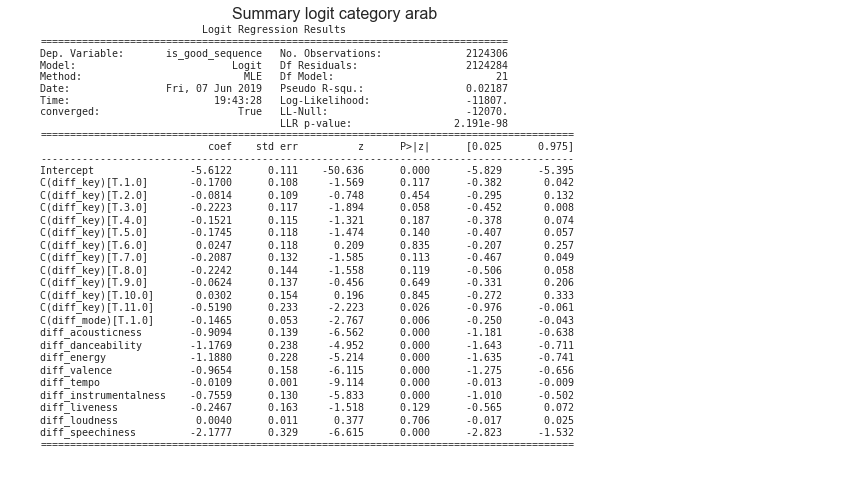

In [39]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

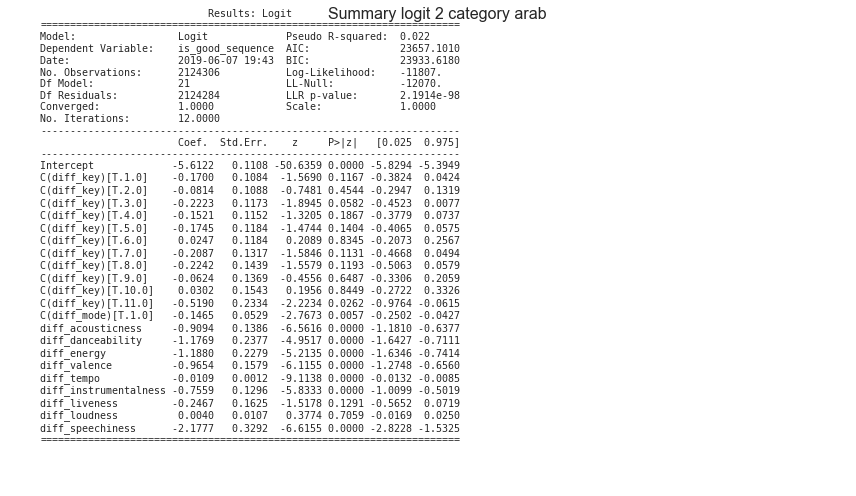

In [40]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [41]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.003653  0.000000e+00  0.002940  0.004540         True
C(key)[T.1.0]     0.843648  1.166540e-01  0.682215  1.043280        False
C(key)[T.2.0]     0.921816  4.544044e-01  0.744756  1.140970        False
C(key)[T.3.0]     0.800673  5.815993e-02  0.636171  1.007712        False
C(key)[T.4.0]     0.858868  1.866557e-01  0.685266  1.076450        False
C(key)[T.5.0]     0.839853  1.403793e-01  0.665952  1.059165        False
C(key)[T.6.0]     1.025036  8.345379e-01  0.812782  1.292720        False
C(key)[T.7.0]     0.811639  1.130603e-01  0.626981  1.050682        False
C(key)[T.8.0]     0.799128  1.192531e-01  0.602700  1.059575        False
C(key)[T.9.0]     0.939543  6.486700e-01  0.718468  1.228642        False
C(key)[T.10.0]    1.030637  8.449219e-01  0.761697  1.394535        False
C(key)[T.11.0]    0.595142  2.619143e-02  0.376653  0.940372         True
C(mode)[T.1.0]    0.863735  5.652718e-03  0.778612  0.958164         True
acousticness      0.402776  5.323357e-11  0.306969  0.528484         True
danceability      0.308234  7.355889e-07  0.193452  0.491122         True
energy            0.304838  1.853070e-07  0.195034  0.476462         True
valence           0.380836  9.627823e-10  0.279491  0.518930         True
tempo             0.989170  7.955342e-20  0.986856  0.991489         True
instrumentalness  0.469577  5.434456e-09  0.364252  0.605358         True
liveness          0.781388  1.290637e-01  0.568230  1.074508        False
loudness          1.004040  7.058739e-01  0.983234  1.025287        False
speechiness       0.113307  3.703658e-11  0.059438  0.215999         True

# Category Blues:

## Loading data

In [42]:
file = "df_diff_category_blues_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [43]:
category = file.split('.')[-2].split('_')[-2]
category

'blues'

## Eliminating duplicates in case they exist

In [44]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759512 entries, 0 to 759511
Data columns (total 13 columns):
current_track-next_track    759512 non-null object
diff_acousticness           759512 non-null float64
diff_danceability           759512 non-null float64
diff_energy                 759512 non-null float64
diff_valence                759512 non-null float64
diff_tempo                  759512 non-null float64
diff_instrumentalness       759512 non-null float64
diff_key                    759512 non-null float64
diff_mode                   759512 non-null float64
diff_liveness               759512 non-null float64
diff_loudness               759512 non-null float64
diff_speechiness            759512 non-null float64
is_good_sequence            759512 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 75.3+ MB


In [45]:
# check for duplicates

len(df['current_track-next_track'].unique())

759512

In [46]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    758641
1       871
Name: is_good_sequence, dtype: int64

In [47]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [48]:
df['is_good_sequence'].value_counts()

0    758641
1       871
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [49]:
df.describe()

diff_acousticness  diff_danceability    diff_energy   diff_valence  \
count      759512.000000      759512.000000  759512.000000  759512.000000   
mean            0.409795           0.153779       0.282904       0.239094   
std             0.306517           0.115483       0.202142       0.172469   
min             0.000000           0.000000       0.000000       0.000000   
25%             0.122100           0.061000       0.115000       0.098000   
50%             0.363950           0.130000       0.246000       0.207000   
75%             0.683000           0.223000       0.421000       0.350000   
max             0.995991           0.825000       0.976800       0.909000   

          diff_tempo  diff_instrumentalness       diff_key      diff_mode  \
count  759512.000000          759512.000000  759512.000000  759512.000000   
mean       37.246164               0.124616       4.132367       0.411422   
std        27.860721               0.228892       2.975545       0.492092   
min         0.000000               0.000000       0.000000       0.000000   
25%        14.267000               0.000850       2.000000       0.000000   
50%        31.150500               0.012252       4.000000       0.000000   
75%        55.648000               0.116000       6.000000       1.000000   
max       153.390000               0.951000      11.000000       1.000000   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count  759512.000000  759512.000000     759512.000000     759512.000000  
mean        0.183000       4.393962          0.040546          0.001147  
std         0.219376       3.523839          0.062839          0.033845  
min         0.000000       0.000000          0.000000          0.000000  
25%         0.034000       1.607000          0.008000          0.000000  
50%         0.096000       3.541000          0.020400          0.000000  
75%         0.228000       6.447000          0.047700          0.000000  
max         0.963900      26.027000          0.717800          1.000000

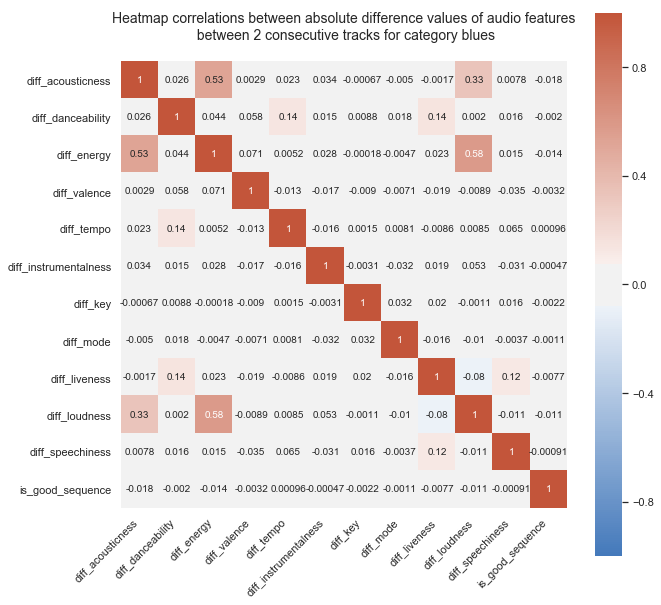

In [50]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [51]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.008655
         Iterations 12


## Summary Logit

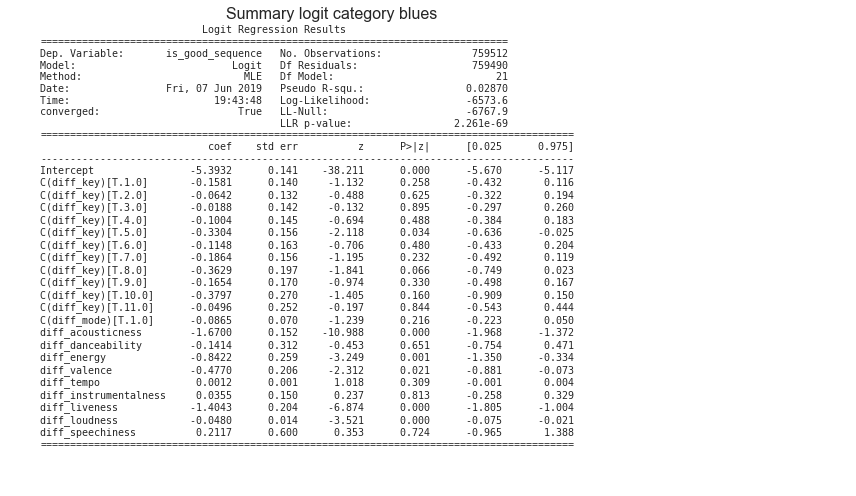

In [52]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

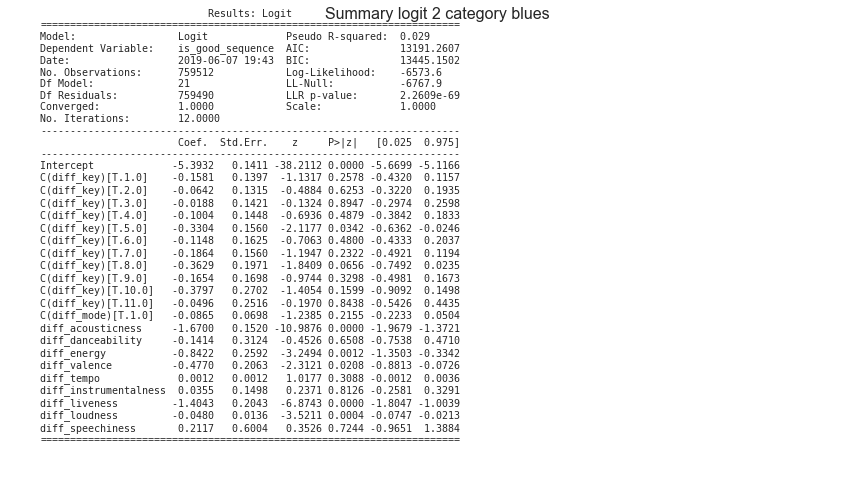

In [53]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [54]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.004547  0.000000e+00  0.003448  0.005996         True
C(key)[T.1.0]     0.853735  2.577721e-01  0.649202  1.122706        False
C(key)[T.2.0]     0.937796  6.252903e-01  0.724719  1.213519        False
C(key)[T.3.0]     0.981364  8.947056e-01  0.742753  1.296628        False
C(key)[T.4.0]     0.904468  4.879475e-01  0.681029  1.201215        False
C(key)[T.5.0]     0.718632  3.420385e-02  0.529295  0.975696         True
C(key)[T.6.0]     0.891570  4.800305e-01  0.648380  1.225975        False
C(key)[T.7.0]     0.829977  2.322056e-01  0.611350  1.126789        False
C(key)[T.8.0]     0.695668  6.564061e-02  0.472725  1.023754        False
C(key)[T.9.0]     0.847537  3.298402e-01  0.607657  1.182113        False
C(key)[T.10.0]    0.684056  1.598879e-01  0.402828  1.161620        False
C(key)[T.11.0]    0.951652  8.438353e-01  0.581228  1.558152        False
C(mode)[T.1.0]    0.917172  2.155184e-01  0.799889  1.051652        False
acousticness      0.188254  4.383804e-28  0.139757  0.253579         True
danceability      0.868129  6.508283e-01  0.470579  1.601532        False
energy            0.430741  1.156336e-03  0.259171  0.715890         True
valence           0.620649  2.077228e-02  0.414230  0.929930         True
tempo             1.001246  3.088041e-01  0.998848  1.003650        False
instrumentalness  1.036155  8.125895e-01  0.772519  1.389763        False
liveness          0.245543  6.231478e-12  0.164529  0.366448         True
loudness          0.953126  4.296844e-04  0.927993  0.978939         True
speechiness       1.235767  7.243964e-01  0.380962  4.008596        False

# Category Chill:

## Loading data

In [55]:
file = "df_diff_category_chill_2019-06-07.csv"

df = pd.read_csv(input_folder+file)

In [56]:
category = file.split('.')[-2].split('_')[-2]
category

'chill'

## Eliminating duplicates in case they exist

In [57]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15891092 entries, 0 to 15891091
Data columns (total 13 columns):
current_track-next_track    15891092 non-null object
diff_acousticness           15891092 non-null float64
diff_danceability           15891092 non-null float64
diff_energy                 15891092 non-null float64
diff_valence                15891092 non-null float64
diff_tempo                  15891092 non-null float64
diff_instrumentalness       15891092 non-null float64
diff_key                    15891092 non-null float64
diff_mode                   15891092 non-null float64
diff_liveness               15891092 non-null float64
diff_loudness               15891092 non-null float64
diff_speechiness            15891092 non-null float64
is_good_sequence            15891092 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ GB


In [58]:
# check for duplicates

len(df['current_track-next_track'].unique())

15786406

In [59]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    15884189
1        6903
Name: is_good_sequence, dtype: int64

In [60]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [61]:
df['is_good_sequence'].value_counts()

0    15779741
1        6901
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [62]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       1.578664e+07       1.578664e+07  1.578664e+07  1.578664e+07   
mean        3.916019e-01       2.098848e-01  2.703198e-01  2.617517e-01   
std         2.878145e-01       1.600643e-01  1.957098e-01  1.961574e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.300000e-01       8.100000e-02  1.100000e-01  1.020000e-01   
50%         3.410000e-01       1.740000e-01  2.340000e-01  2.220000e-01   
75%         6.320000e-01       3.060000e-01  3.960000e-01  3.850000e-01   
max         9.959985e-01       9.750000e-01  9.997600e-01  1.000000e+00   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  1.578664e+07           1.578664e+07  1.578664e+07  1.578664e+07   
mean   3.455814e+01           4.050553e-01  4.096730e+00  4.384936e-01   
std    2.627726e+01           3.901397e-01  2.940552e+00  4.962026e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.345500e+01           7.440000e-03  2.000000e+00  0.000000e+00   
50%    2.914400e+01           2.600000e-01  4.000000e+00  0.000000e+00   
75%    5.001100e+01           8.456810e-01  6.000000e+00  1.000000e+00   
max    2.199770e+02           9.990000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   1.578664e+07   1.578664e+07      1.578664e+07      1.578664e+07  
mean    9.615406e-02   6.603062e+00      4.031406e-02      4.371417e-04  
std     1.445307e-01   6.002074e+00      7.394912e-02      2.090336e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     1.500000e-02   2.087000e+00      5.600000e-03      0.000000e+00  
50%     3.710000e-02   4.700000e+00      1.390000e-02      0.000000e+00  
75%     1.092000e-01   9.389000e+00      3.700000e-02      0.000000e+00  
max     9.506000e-01   4.071800e+01      8.620000e-01      1.000000e+00

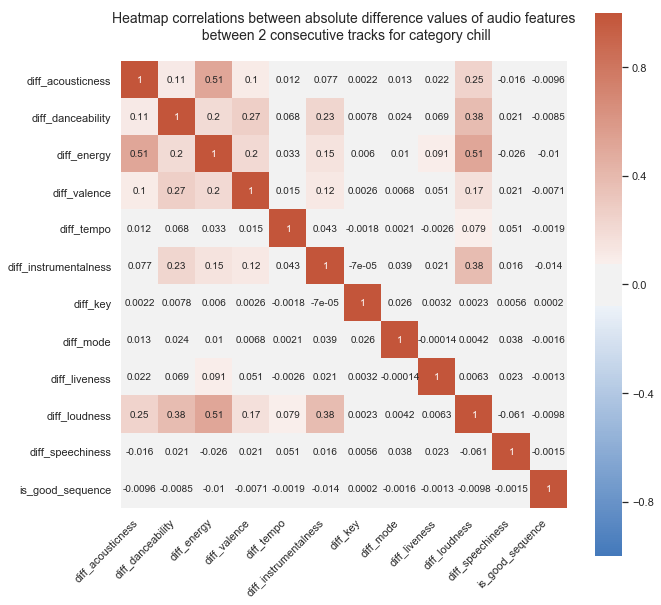

In [63]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [64]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.003620
         Iterations 13


## Summary Logit

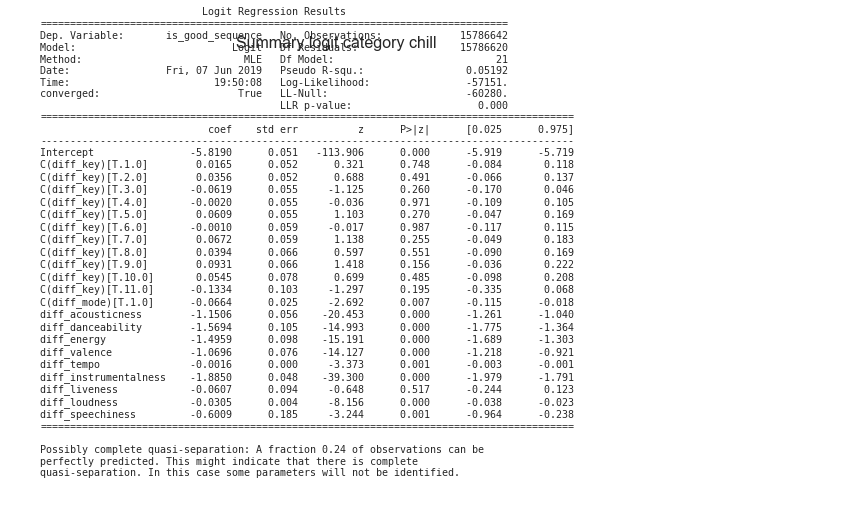

In [65]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

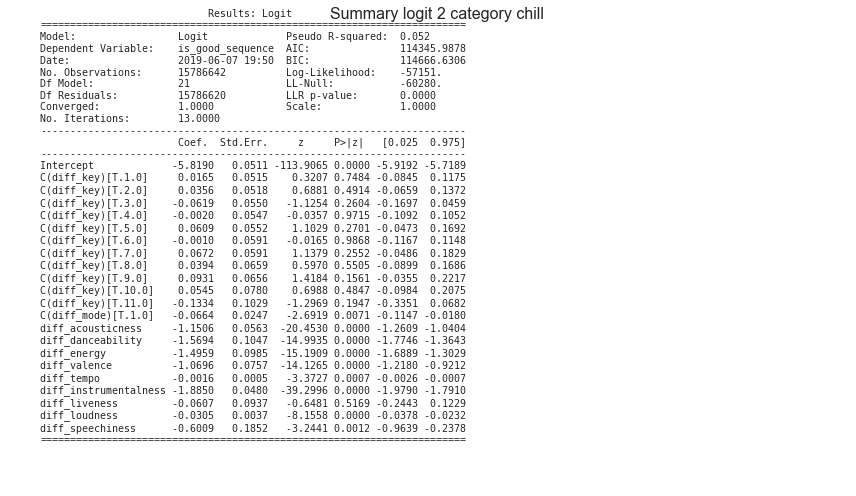

In [66]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [67]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.002970  0.000000e+00  0.002687  0.003283         True
C(key)[T.1.0]     1.016663  7.484067e-01  0.919009  1.124694        False
C(key)[T.2.0]     1.036284  4.913729e-01  0.936249  1.147006        False
C(key)[T.3.0]     0.939967  2.603994e-01  0.843895  1.046976        False
C(key)[T.4.0]     0.998047  9.714864e-01  0.896592  1.110983        False
C(key)[T.5.0]     1.062809  2.700887e-01  0.953762  1.184324        False
C(key)[T.6.0]     0.999025  9.868257e-01  0.889819  1.121635        False
C(key)[T.7.0]     1.069507  2.551819e-01  0.952609  1.200750        False
C(key)[T.8.0]     1.040146  5.505127e-01  0.914056  1.183628        False
C(key)[T.9.0]     1.097552  1.560803e-01  0.965082  1.248205        False
C(key)[T.10.0]    1.056056  4.846626e-01  0.906260  1.230613        False
C(key)[T.11.0]    0.875083  1.946625e-01  0.715272  1.070601        False
C(mode)[T.1.0]    0.935796  7.105324e-03  0.891658  0.982120         True
acousticness      0.316441  5.644484e-93  0.283405  0.353328         True
danceability      0.208166  8.100359e-51  0.169556  0.255569         True
energy            0.224040  4.062033e-52  0.184715  0.271736         True
valence           0.343145  2.606421e-45  0.295820  0.398040         True
tempo             0.998376  7.444416e-04  0.997434  0.999320         True
instrumentalness  0.151828  0.000000e+00  0.138205  0.166793         True
liveness          0.941091  5.169178e-01  0.783232  1.130767        False
loudness          0.969975  3.469525e-16  0.962895  0.977107         True
speechiness       0.548334  1.178352e-03  0.381403  0.788326         True

# Category Classical:

## Loading data

In [68]:
file = "df_diff_category_classical_2019-06-07.csv"

df = pd.read_csv(input_folder+file)

In [69]:
category = file.split('.')[-2].split('_')[-2]
category

'classical'

## Eliminating duplicates in case they exist

In [70]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15284744 entries, 0 to 15284743
Data columns (total 13 columns):
current_track-next_track    15284744 non-null object
diff_acousticness           15284744 non-null float64
diff_danceability           15284744 non-null float64
diff_energy                 15284744 non-null float64
diff_valence                15284744 non-null float64
diff_tempo                  15284744 non-null float64
diff_instrumentalness       15284744 non-null float64
diff_key                    15284744 non-null float64
diff_mode                   15284744 non-null float64
diff_liveness               15284744 non-null float64
diff_loudness               15284744 non-null float64
diff_speechiness            15284744 non-null float64
is_good_sequence            15284744 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ GB


In [71]:
# check for duplicates

len(df['current_track-next_track'].unique())

15253062

In [72]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    15277974
1        6770
Name: is_good_sequence, dtype: int64

In [73]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [74]:
df['is_good_sequence'].value_counts()

0    15246358
1        6770
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [75]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       1.525313e+07       1.525313e+07  1.525313e+07  1.525313e+07   
mean        1.178049e-01       1.722196e-01  1.295450e-01  1.834410e-01   
std         1.757714e-01       1.328109e-01  1.341168e-01  1.994519e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.700000e-02       6.600000e-02  3.610000e-02  3.060000e-02   
50%         5.000000e-02       1.430000e-01  8.840000e-02  1.082000e-01   
75%         1.330000e-01       2.500000e-01  1.765000e-01  2.770000e-01   
max         9.960000e-01       9.020000e-01  9.999811e-01  9.910000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  1.525313e+07           1.525313e+07  1.525313e+07  1.525313e+07   
mean   3.335311e+01           3.844817e-01  3.953240e+00  4.615445e-01   
std    2.601316e+01           3.368103e-01  2.840087e+00  4.985190e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.187100e+01           6.200000e-02  2.000000e+00  0.000000e+00   
50%    2.776200e+01           2.810000e-01  3.000000e+00  0.000000e+00   
75%    4.980600e+01           7.390000e-01  6.000000e+00  1.000000e+00   
max    2.158020e+02           9.980000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   1.525313e+07   1.525313e+07      1.525313e+07      1.525313e+07  
mean    9.566150e-02   7.104770e+00      7.093611e-02      4.438434e-04  
std     1.365543e-01   5.600749e+00      1.909552e-01      2.106292e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     1.760000e-02   2.727000e+00      3.900000e-03      0.000000e+00  
50%     4.120000e-02   5.838000e+00      8.800000e-03      0.000000e+00  
75%     1.110000e-01   1.016800e+01      2.040000e-02      0.000000e+00  
max     9.273000e-01   4.779200e+01      9.630000e-01      1.000000e+00

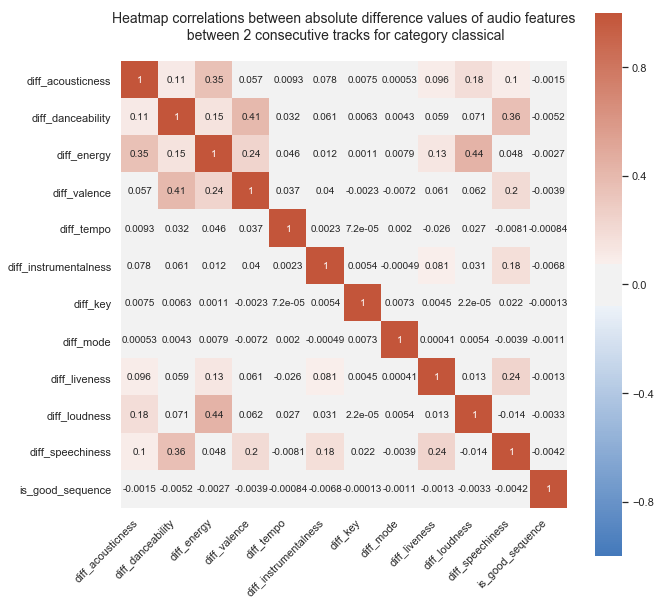

In [76]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [77]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.003821
         Iterations 13


## Summary Logit

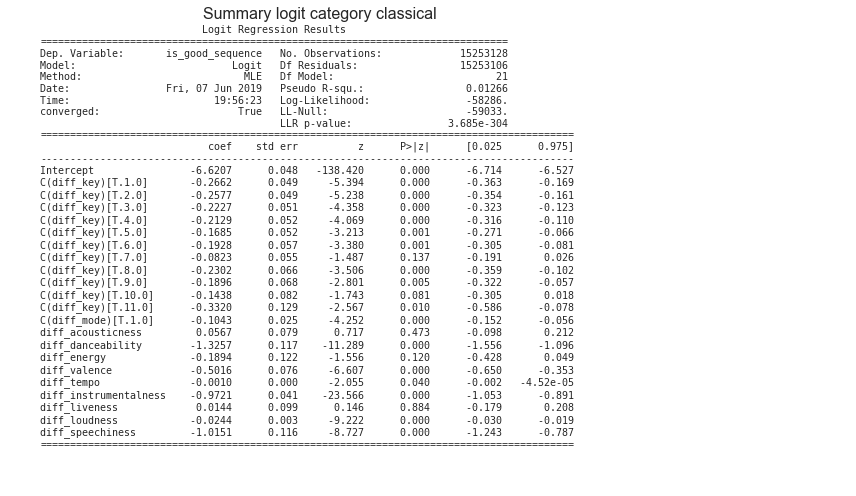

In [78]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

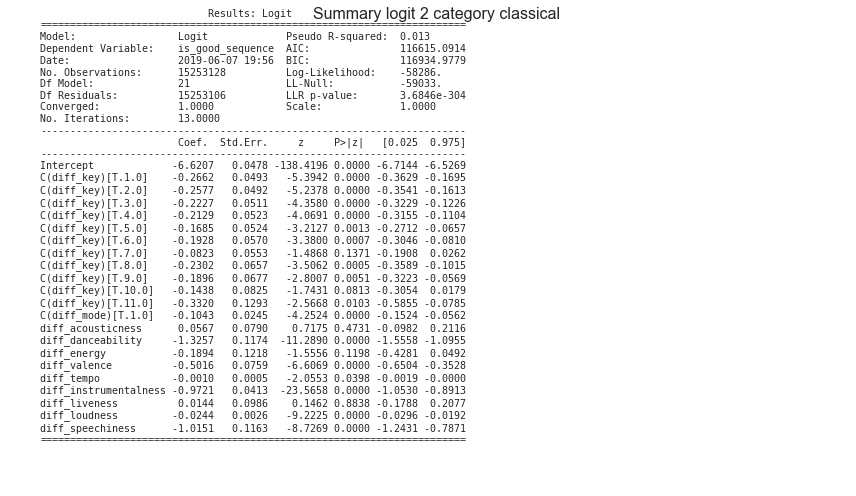

In [79]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [80]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR        p-value      2.5%     97.5%  significant
Intercept         0.001333   0.000000e+00  0.001213  0.001464         True
C(key)[T.1.0]     0.766301   6.883325e-08  0.695659  0.844117         True
C(key)[T.2.0]     0.772844   1.624670e-07  0.701805  0.851074         True
C(key)[T.3.0]     0.800324   1.312629e-05  0.724037  0.884649         True
C(key)[T.4.0]     0.808202   4.719967e-05  0.729415  0.895499         True
C(key)[T.5.0]     0.844958   1.314754e-03  0.762430  0.936419         True
C(key)[T.6.0]     0.824652   7.249013e-04  0.737426  0.922196         True
C(key)[T.7.0]     0.921003   1.370802e-01  0.826318  1.026538        False
C(key)[T.8.0]     0.794363   4.545720e-04  0.698440  0.903459         True
C(key)[T.9.0]     0.827298   5.099432e-03  0.724503  0.944677         True
C(key)[T.10.0]    0.866102   8.132398e-02  0.736834  1.018050        False
C(key)[T.11.0]    0.717484   1.026394e-02  0.556818  0.924509         True
C(mode)[T.1.0]    0.900924   2.114472e-05  0.858625  0.945306         True
acousticness      1.058330   4.730797e-01  0.906488  1.235607        False
danceability      0.265623   1.487587e-29  0.211012  0.334367         True
energy            0.827419   1.197940e-01  0.651729  1.050471        False
valence           0.605566   3.925579e-11  0.521842  0.702724         True
tempo             0.999026   3.984683e-02  0.998098  0.999955         True
instrumentalness  0.378272  8.649625e-123  0.348891  0.410127         True
liveness          1.014519   8.837673e-01  0.836241  1.230805        False
loudness          0.975884   2.903491e-20  0.970834  0.980960         True
speechiness       0.362375   2.617809e-18  0.288502  0.455162         True

# Category Country:

## Loading data

In [81]:
file = "df_diff_category_country_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [82]:
category = file.split('.')[-2].split('_')[-2]
category

'country'

## Eliminating duplicates in case they exist

In [83]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462656 entries, 0 to 4462655
Data columns (total 13 columns):
current_track-next_track    4462656 non-null object
diff_acousticness           4462656 non-null float64
diff_danceability           4462656 non-null float64
diff_energy                 4462656 non-null float64
diff_valence                4462656 non-null float64
diff_tempo                  4462656 non-null float64
diff_instrumentalness       4462656 non-null float64
diff_key                    4462656 non-null float64
diff_mode                   4462656 non-null float64
diff_liveness               4462656 non-null float64
diff_loudness               4462656 non-null float64
diff_speechiness            4462656 non-null float64
is_good_sequence            4462656 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 442.6+ MB


In [84]:
# check for duplicates

len(df['current_track-next_track'].unique())

4462656

In [85]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    4460544
1       2112
Name: is_good_sequence, dtype: int64

In [86]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [87]:
df['is_good_sequence'].value_counts()

0    4460544
1       2112
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [88]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       4.462656e+06       4.462656e+06  4.462656e+06  4.462656e+06   
mean        3.372419e-01       1.267001e-01  2.440142e-01  2.550260e-01   
std         2.556621e-01       9.918591e-02  1.762136e-01  1.821604e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.127000e-01       4.900000e-02  9.700000e-02  1.040000e-01   
50%         2.860000e-01       1.040000e-01  2.120000e-01  2.230000e-01   
75%         5.325000e-01       1.820000e-01  3.610000e-01  3.760000e-01   
max         9.949408e-01       7.730000e-01  9.500000e-01  9.151000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  4.462656e+06           4.462656e+06  4.462656e+06  4.462656e+06   
mean   3.442186e+01           2.749105e-02  3.919936e+00  2.137705e-01   
std    2.561308e+01           1.093750e-01  2.816809e+00  4.099667e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.363100e+01           1.770000e-06  2.000000e+00  0.000000e+00   
50%    2.922100e+01           5.190000e-05  3.000000e+00  0.000000e+00   
75%    5.034900e+01           1.440000e-03  6.000000e+00  0.000000e+00   
max    1.597080e+02           9.590000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   4.462656e+06   4.462656e+06      4.462656e+06      4.462656e+06  
mean    1.282476e-01   4.076352e+00      2.713009e-02      4.732608e-04  
std     1.538138e-01   3.095261e+00      5.262477e-02      2.174941e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     2.800000e-02   1.548000e+00      4.300000e-03      0.000000e+00  
50%     7.260000e-02   3.421000e+00      1.090000e-02      0.000000e+00  
75%     1.730000e-01   6.026000e+00      2.750000e-02      0.000000e+00  
max     9.458000e-01   2.273700e+01      8.072000e-01      1.000000e+00

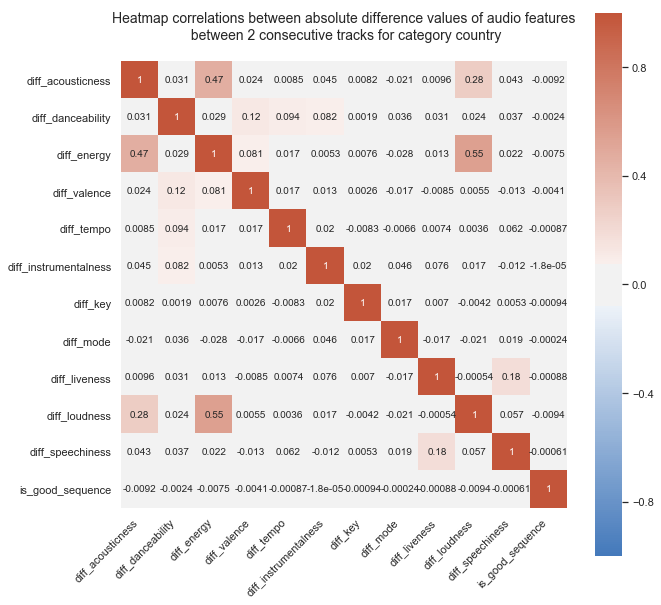

In [89]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [90]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.004007
         Iterations 12


## Summary Logit

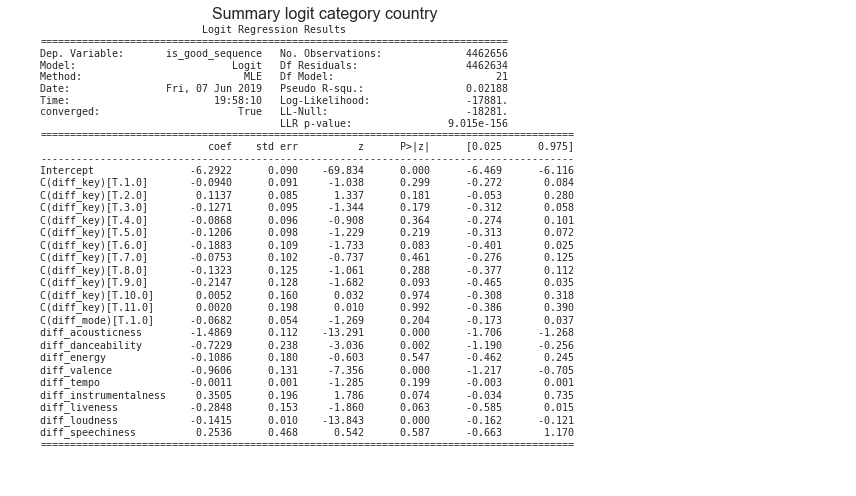

In [91]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

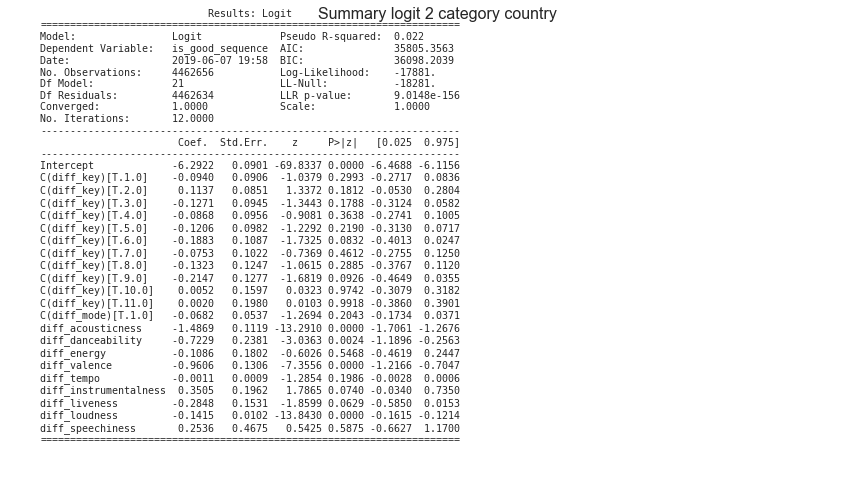

In [92]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [93]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.001851  0.000000e+00  0.001551  0.002208         True
C(key)[T.1.0]     0.910239  2.993303e-01  0.762119  1.087147        False
C(key)[T.2.0]     1.120457  1.811725e-01  0.948403  1.323722        False
C(key)[T.3.0]     0.880660  1.788486e-01  0.731713  1.059928        False
C(key)[T.4.0]     0.916885  3.638254e-01  0.760289  1.105735        False
C(key)[T.5.0]     0.886349  2.190055e-01  0.731238  1.074362        False
C(key)[T.6.0]     0.828372  8.318062e-02  0.669446  1.025027        False
C(key)[T.7.0]     0.927472  4.611778e-01  0.759156  1.133107        False
C(key)[T.8.0]     0.876055  2.884674e-01  0.686151  1.118518        False
C(key)[T.9.0]     0.806775  9.258209e-02  0.628189  1.036130        False
C(key)[T.10.0]    1.005176  9.742202e-01  0.734970  1.374719        False
C(key)[T.11.0]    1.002044  9.917713e-01  0.679756  1.477137        False
C(mode)[T.1.0]    0.934107  2.043123e-01  0.840789  1.037781        False
acousticness      0.226076  2.609769e-40  0.181564  0.281501         True
danceability      0.485331  2.394630e-03  0.304352  0.773928         True
energy            0.897077  5.467931e-01  0.630087  1.277199        False
valence           0.382650  1.900139e-13  0.296234  0.494273         True
tempo             0.998879  1.986456e-01  0.997171  1.000589        False
instrumentalness  1.419741  7.401899e-02  0.966542  2.085440        False
liveness          0.752139  6.289539e-02  0.557113  1.015437        False
loudness          0.868077  1.403072e-43  0.850862  0.885641         True
speechiness       1.288693  5.874804e-01  0.515455  3.221871        False

# Category Dance:

## Loading data

In [94]:
file = "df_diff_category_dance_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [95]:
category = file.split('.')[-2].split('_')[-2]
category

'dance'

## Eliminating duplicates in case they exist

In [96]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11679306 entries, 0 to 11679305
Data columns (total 13 columns):
current_track-next_track    11679306 non-null object
diff_acousticness           11679306 non-null float64
diff_danceability           11679306 non-null float64
diff_energy                 11679306 non-null float64
diff_valence                11679306 non-null float64
diff_tempo                  11679306 non-null float64
diff_instrumentalness       11679306 non-null float64
diff_key                    11679306 non-null float64
diff_mode                   11679306 non-null float64
diff_liveness               11679306 non-null float64
diff_loudness               11679306 non-null float64
diff_speechiness            11679306 non-null float64
is_good_sequence            11679306 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.1+ GB


In [97]:
# check for duplicates

len(df['current_track-next_track'].unique())

11679306

In [98]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    11675889
1        3417
Name: is_good_sequence, dtype: int64

In [99]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [100]:
df['is_good_sequence'].value_counts()

0    11675889
1        3417
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [101]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       1.167931e+07       1.167931e+07  1.167931e+07  1.167931e+07   
mean        1.445946e-01       1.587755e-01  1.897355e-01  2.694977e-01   
std         2.103686e-01       1.230785e-01  1.564845e-01  1.995671e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.063100e-02       6.100000e-02  6.700000e-02  1.050000e-01   
50%         4.923000e-02       1.320000e-01  1.500000e-01  2.300000e-01   
75%         1.859000e-01       2.290000e-01  2.730000e-01  3.980000e-01   
max         9.889983e-01       8.860000e-01  9.008000e-01  9.523000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  1.167931e+07           1.167931e+07  1.167931e+07  1.167931e+07   
mean   1.884465e+01           4.178036e-01  4.149786e+00  4.988798e-01   
std    1.840260e+01           3.474216e-01  2.993819e+00  4.999988e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.028000e+00           5.523200e-02  2.000000e+00  0.000000e+00   
50%    1.296500e+01           3.719988e-01  4.000000e+00  0.000000e+00   
75%    2.798900e+01           7.849225e-01  6.000000e+00  1.000000e+00   
max    1.465160e+02           9.650000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   1.167931e+07   1.167931e+07      1.167931e+07      1.167931e+07  
mean    1.609163e-01   3.536965e+00      7.202028e-02      2.925688e-04  
std     1.736766e-01   2.820103e+00      9.254519e-02      1.710214e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     3.200000e-02   1.351000e+00      1.240000e-02      0.000000e+00  
50%     9.280000e-02   2.897000e+00      3.310000e-02      0.000000e+00  
75%     2.393000e-01   5.056000e+00      9.370000e-02      0.000000e+00  
max     9.536000e-01   2.493800e+01      6.607000e-01      1.000000e+00

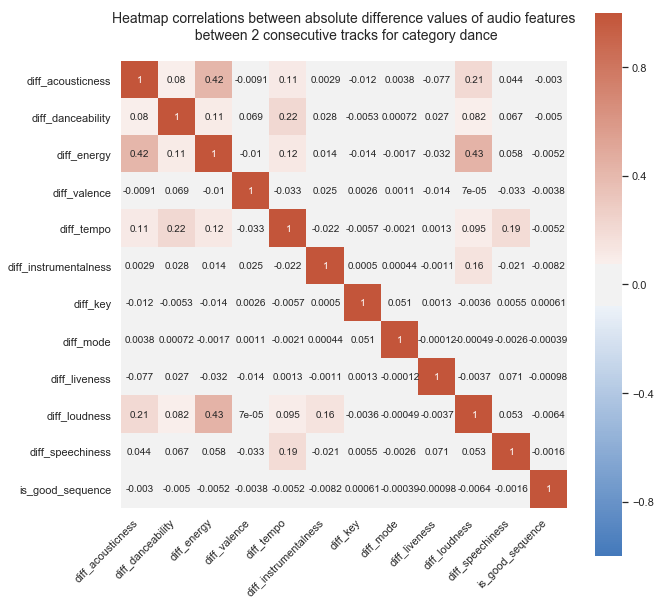

In [102]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [103]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.002587
         Iterations 13


## Summary Logit

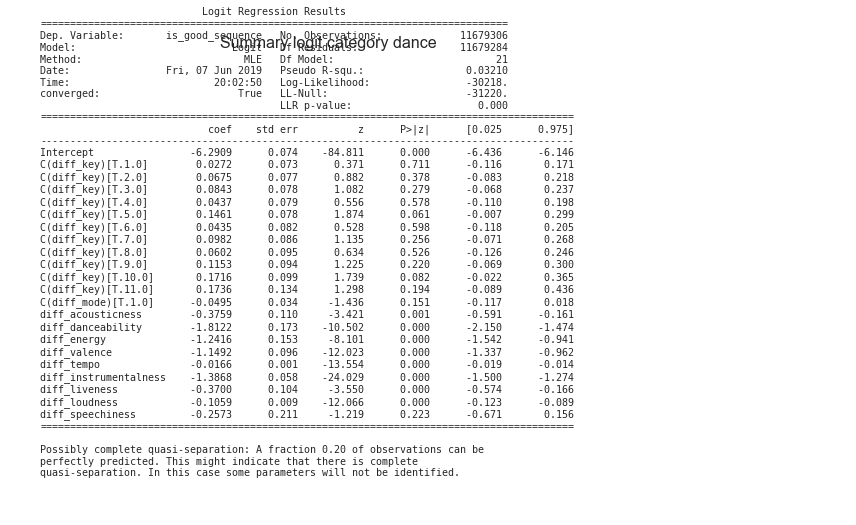

In [104]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

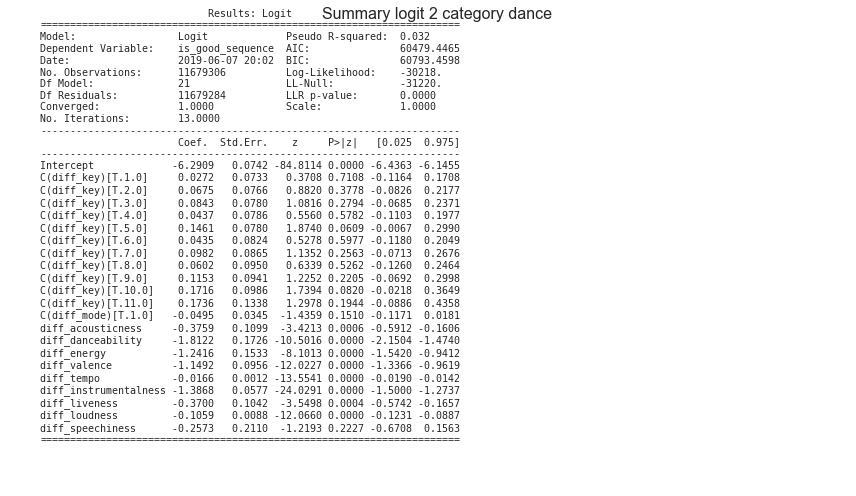

In [105]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [106]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR        p-value      2.5%     97.5%  significant
Intercept         0.001853   0.000000e+00  0.001602  0.002143         True
C(key)[T.1.0]     1.027535   7.108187e-01  0.890092  1.186201        False
C(key)[T.2.0]     1.069882   3.778016e-01  0.920752  1.243166        False
C(key)[T.3.0]     1.087977   2.794212e-01  0.933818  1.267586        False
C(key)[T.4.0]     1.044661   5.781974e-01  0.895545  1.218605        False
C(key)[T.5.0]     1.157359   6.092614e-02  0.993321  1.348486        False
C(key)[T.6.0]     1.044428   5.976625e-01  0.888729  1.227404        False
C(key)[T.7.0]     1.103131   2.562993e-01  0.931170  1.306848        False
C(key)[T.8.0]     1.062074   5.261545e-01  0.881627  1.279453        False
C(key)[T.9.0]     1.122240   2.204994e-01  0.933175  1.349610        False
C(key)[T.10.0]    1.187158   8.197313e-02  0.978475  1.440349        False
C(key)[T.11.0]    1.189594   1.943529e-01  0.915231  1.546203        False
C(mode)[T.1.0]    0.951686   1.510226e-01  0.889485  1.018236        False
acousticness      0.686667   6.231630e-04  0.553635  0.851665         True
danceability      0.163293   8.490744e-26  0.116434  0.229011         True
energy            0.288918   5.435548e-16  0.213953  0.390148         True
valence           0.316887   2.701443e-33  0.262749  0.382180         True
tempo             0.983522   7.488351e-42  0.981162  0.985888         True
instrumentalness  0.249863  1.380998e-127  0.223139  0.279788         True
liveness          0.690766   3.854724e-04  0.563147  0.847307         True
loudness          0.899492   1.596967e-33  0.884148  0.915103         True
speechiness       0.773156   2.227199e-01  0.511289  1.169144        False

# Category Decades:

## Loading data

In [107]:
file = "df_diff_category_decades_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [108]:
category = file.split('.')[-2].split('_')[-2]
category

'decades'

## Eliminating duplicates in case they exist

In [109]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10820810 entries, 0 to 10820809
Data columns (total 13 columns):
current_track-next_track    10820810 non-null object
diff_acousticness           10820810 non-null float64
diff_danceability           10820810 non-null float64
diff_energy                 10820810 non-null float64
diff_valence                10820810 non-null float64
diff_tempo                  10820810 non-null float64
diff_instrumentalness       10820810 non-null float64
diff_key                    10820810 non-null float64
diff_mode                   10820810 non-null float64
diff_liveness               10820810 non-null float64
diff_loudness               10820810 non-null float64
diff_speechiness            10820810 non-null float64
is_good_sequence            10820810 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.0+ GB


In [110]:
# check for duplicates

len(df['current_track-next_track'].unique())

10820810

In [111]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    10817521
1        3289
Name: is_good_sequence, dtype: int64

In [112]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [113]:
df['is_good_sequence'].value_counts()

0    10817521
1        3289
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [114]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       1.082081e+07       1.082081e+07  1.082081e+07  1.082081e+07   
mean        3.108049e-01       1.654810e-01  2.399445e-01  2.681549e-01   
std         2.586350e-01       1.243043e-01  1.753998e-01  1.932969e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         8.397110e-02       6.600000e-02  9.600000e-02  1.080000e-01   
50%         2.440000e-01       1.400000e-01  2.070000e-01  2.330000e-01   
75%         4.994400e-01       2.390000e-01  3.530000e-01  3.980000e-01   
max         9.949952e-01       8.760000e-01  9.708000e-01  9.521000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  1.082081e+07           1.082081e+07  1.082081e+07  1.082081e+07   
mean   3.134763e+01           8.523990e-02  4.013736e+00  3.474313e-01   
std    2.403615e+01           2.041649e-01  2.883390e+00  4.761542e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.218600e+01           1.460000e-05  2.000000e+00  0.000000e+00   
50%    2.621200e+01           6.760000e-04  4.000000e+00  0.000000e+00   
75%    4.521900e+01           2.739815e-02  6.000000e+00  1.000000e+00   
max    1.484570e+02           9.670000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   1.082081e+07   1.082081e+07      1.082081e+07      1.082081e+07  
mean    1.345757e-01   3.906353e+00      3.629570e-02      3.039514e-04  
std     1.462661e-01   3.023695e+00      5.956297e-02      1.743155e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     3.300000e-02   1.521000e+00      5.900000e-03      0.000000e+00  
50%     8.200000e-02   3.259000e+00      1.560000e-02      0.000000e+00  
75%     1.917000e-01   5.640000e+00      4.050000e-02      0.000000e+00  
max     9.724000e-01   2.877600e+01      8.076000e-01      1.000000e+00

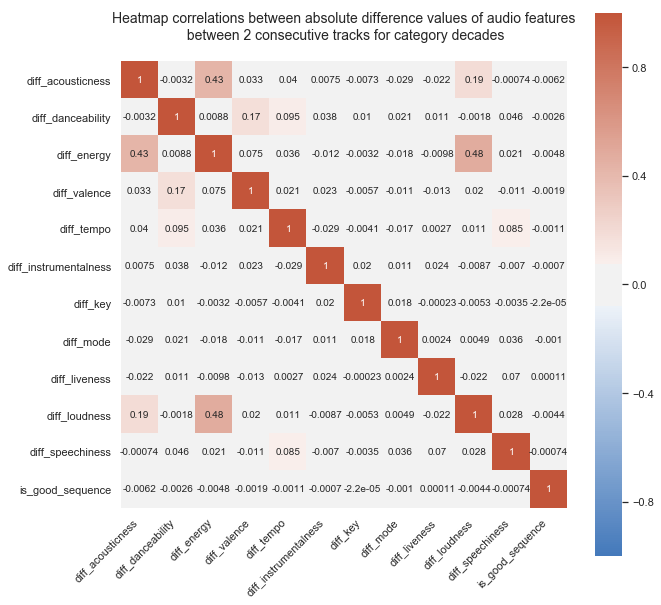

In [115]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [116]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.002730
         Iterations 13


## Summary Logit

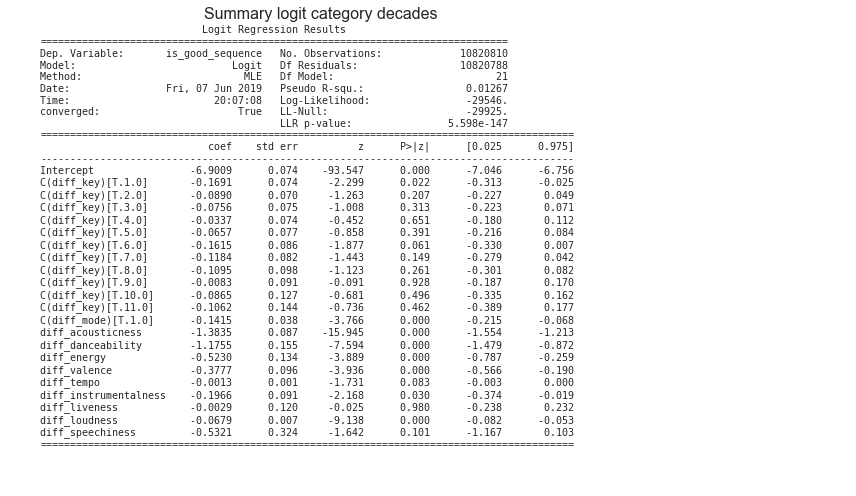

In [117]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

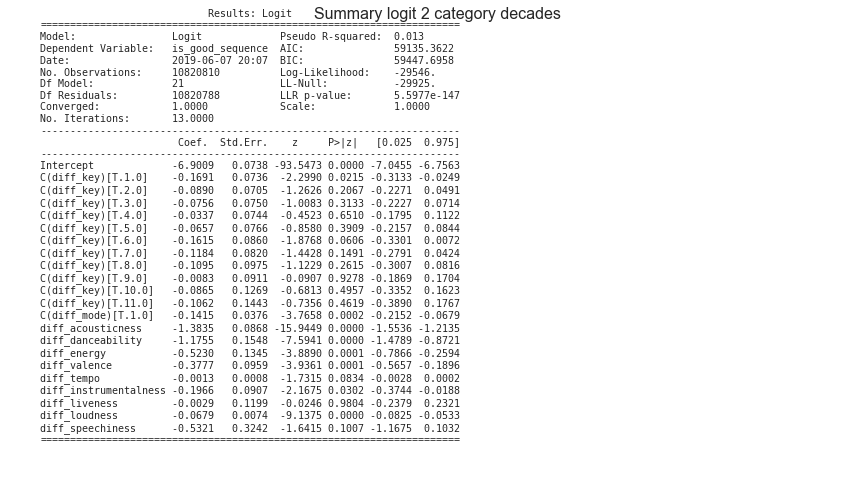

In [118]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [119]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.001007  0.000000e+00  0.000871  0.001163         True
C(key)[T.1.0]     0.844415  2.150226e-02  0.731045  0.975366         True
C(key)[T.2.0]     0.914854  2.067242e-01  0.796817  1.050377        False
C(key)[T.3.0]     0.927144  3.132888e-01  0.800368  1.074001        False
C(key)[T.4.0]     0.966897  6.510209e-01  0.835667  1.118734        False
C(key)[T.5.0]     0.936431  3.908983e-01  0.805964  1.088017        False
C(key)[T.6.0]     0.850899  6.055057e-02  0.718864  1.007184        False
C(key)[T.7.0]     0.888381  1.490746e-01  0.756441  1.043335        False
C(key)[T.8.0]     0.896257  2.614791e-01  0.740297  1.085073        False
C(key)[T.9.0]     0.991771  9.277647e-01  0.829522  1.185754        False
C(key)[T.10.0]    0.917179  4.957099e-01  0.715211  1.176179        False
C(key)[T.11.0]    0.899270  4.619490e-01  0.677705  1.193274        False
C(mode)[T.1.0]    0.868045  1.659952e-04  0.806410  0.934391         True
acousticness      0.250693  3.091597e-57  0.211487  0.297166         True
danceability      0.308666  3.100003e-14  0.227893  0.418069         True
energy            0.592751  1.006507e-04  0.455413  0.771505         True
valence           0.685466  8.282889e-05  0.567956  0.827288         True
tempo             0.998694  8.336572e-02  0.997218  1.000172        False
instrumentalness  0.821501  3.019312e-02  0.687692  0.981346         True
liveness          0.997060  9.804094e-01  0.788251  1.261183        False
loudness          0.934348  6.389037e-20  0.920837  0.948057         True
speechiness       0.587364  1.006917e-01  0.311159  1.108746        False

# Category Desi:

## Loading data

In [120]:
file = "df_diff_category_desi_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [121]:
category = file.split('.')[-2].split('_')[-2]
category

'desi'

## Eliminating duplicates in case they exist

In [122]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753440 entries, 0 to 7753439
Data columns (total 13 columns):
current_track-next_track    7753440 non-null object
diff_acousticness           7753440 non-null float64
diff_danceability           7753440 non-null float64
diff_energy                 7753440 non-null float64
diff_valence                7753440 non-null float64
diff_tempo                  7753440 non-null float64
diff_instrumentalness       7753440 non-null float64
diff_key                    7753440 non-null float64
diff_mode                   7753440 non-null float64
diff_liveness               7753440 non-null float64
diff_loudness               7753440 non-null float64
diff_speechiness            7753440 non-null float64
is_good_sequence            7753440 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 769.0+ MB


In [123]:
# check for duplicates

len(df['current_track-next_track'].unique())

7753440

In [124]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    7750656
1       2784
Name: is_good_sequence, dtype: int64

In [125]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [126]:
df['is_good_sequence'].value_counts()

0    7750656
1       2784
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [127]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       7.753440e+06       7.753440e+06  7.753440e+06  7.753440e+06   
mean        3.405514e-01       1.780095e-01  2.222852e-01  2.674160e-01   
std         2.527141e-01       1.331602e-01  1.660884e-01  1.938994e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.210000e-01       7.100000e-02  8.800000e-02  1.080000e-01   
50%         2.913700e-01       1.510000e-01  1.900000e-01  2.310000e-01   
75%         5.270000e-01       2.590000e-01  3.240000e-01  3.940000e-01   
max         9.959853e-01       9.116000e-01  9.907500e-01  9.416000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  7.753440e+06           7.753440e+06  7.753440e+06  7.753440e+06   
mean   3.177219e+01           1.279959e-01  4.044142e+00  4.978760e-01   
std    2.385793e+01           2.693864e-01  2.906833e+00  4.999955e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.214600e+01           1.587000e-05  2.000000e+00  0.000000e+00   
50%    2.704400e+01           5.860000e-04  4.000000e+00  0.000000e+00   
75%    4.618500e+01           3.870000e-02  6.000000e+00  1.000000e+00   
max    1.509330e+02           9.830000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   7.753440e+06   7.753440e+06      7.753440e+06      7.753440e+06  
mean    1.584983e-01   4.141104e+00      7.812396e-02      3.590664e-04  
std     1.672272e-01   3.532311e+00      9.160252e-02      1.894565e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     3.780000e-02   1.525000e+00      1.520000e-02      0.000000e+00  
50%     9.810000e-02   3.294000e+00      4.300000e-02      0.000000e+00  
75%     2.256000e-01   5.830000e+00      1.104000e-01      0.000000e+00  
max     9.500000e-01   3.283100e+01      8.466000e-01      1.000000e+00

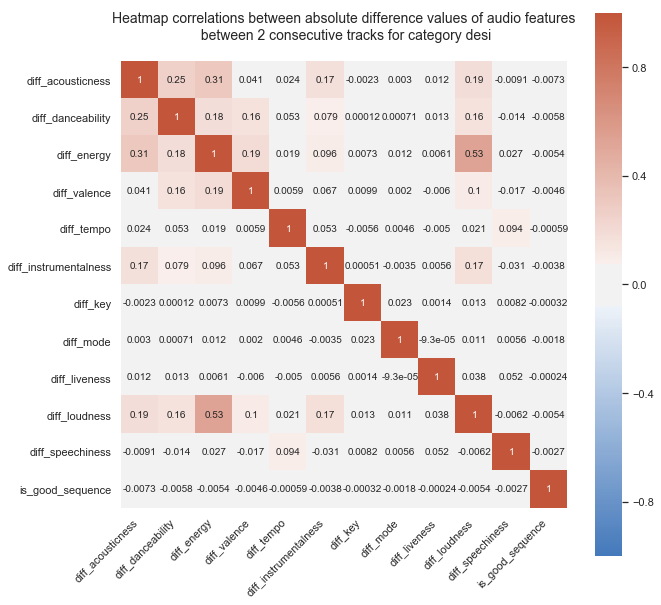

In [128]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [129]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.003140
         Iterations 13


## Summary Logit

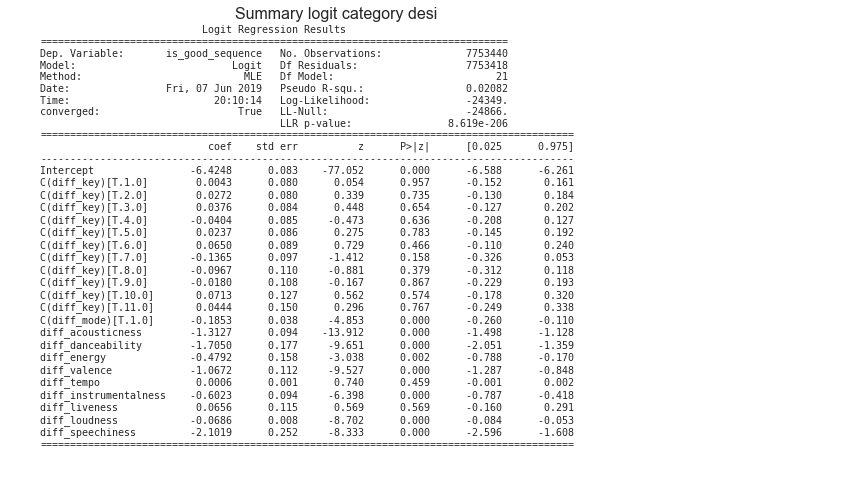

In [130]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

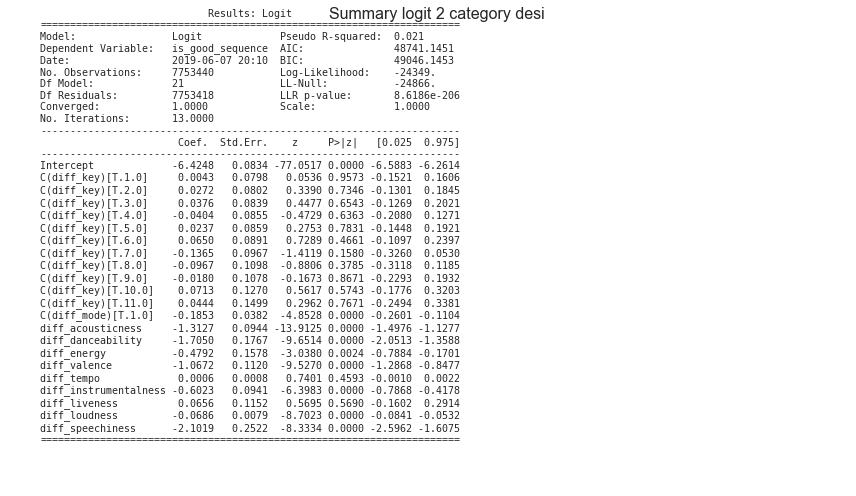

In [131]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [132]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.001621  0.000000e+00  0.001376  0.001909         True
C(key)[T.1.0]     1.004282  9.572843e-01  0.858924  1.174238        False
C(key)[T.2.0]     1.027575  7.346091e-01  0.878037  1.202581        False
C(key)[T.3.0]     1.038297  6.543357e-01  0.880797  1.223961        False
C(key)[T.4.0]     0.960375  6.362743e-01  0.812210  1.135569        False
C(key)[T.5.0]     1.023937  7.830918e-01  0.865229  1.211758        False
C(key)[T.6.0]     1.067125  4.660747e-01  0.896075  1.270827        False
C(key)[T.7.0]     0.872412  1.579817e-01  0.721826  1.054413        False
C(key)[T.8.0]     0.907855  3.785218e-01  0.732109  1.125790        False
C(key)[T.9.0]     0.982132  8.671469e-01  0.795116  1.213137        False
C(key)[T.10.0]    1.073952  5.743235e-01  0.837274  1.377532        False
C(key)[T.11.0]    1.045396  7.670665e-01  0.779302  1.402348        False
C(mode)[T.1.0]    0.830873  1.217566e-06  0.770967  0.895434         True
acousticness      0.269103  5.319293e-44  0.223669  0.323765         True
danceability      0.181771  4.850126e-22  0.128573  0.256979         True
energy            0.619251  2.381620e-03  0.454558  0.843615         True
valence           0.343969  1.618246e-21  0.276166  0.428420         True
tempo             1.000599  4.592686e-01  0.999013  1.002187        False
instrumentalness  0.547547  1.570917e-10  0.455295  0.658490         True
liveness          1.067808  5.690195e-01  0.851985  1.338302        False
loudness          0.933689  3.251437e-18  0.919372  0.948229         True
speechiness       0.122225  7.853304e-17  0.074553  0.200379         True

# Category Dinner:

## Loading data

In [133]:
file = "df_diff_category_dinner_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [134]:
category = file.split('.')[-2].split('_')[-2]
category

'dinner'

## Eliminating duplicates in case they exist

In [135]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634562 entries, 0 to 1634561
Data columns (total 13 columns):
current_track-next_track    1634562 non-null object
diff_acousticness           1634562 non-null float64
diff_danceability           1634562 non-null float64
diff_energy                 1634562 non-null float64
diff_valence                1634562 non-null float64
diff_tempo                  1634562 non-null float64
diff_instrumentalness       1634562 non-null float64
diff_key                    1634562 non-null float64
diff_mode                   1634562 non-null float64
diff_liveness               1634562 non-null float64
diff_loudness               1634562 non-null float64
diff_speechiness            1634562 non-null float64
is_good_sequence            1634562 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 162.1+ MB


In [136]:
# check for duplicates

len(df['current_track-next_track'].unique())

1634562

In [137]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    1633284
1       1278
Name: is_good_sequence, dtype: int64

In [138]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [139]:
df['is_good_sequence'].value_counts()

0    1633284
1       1278
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [140]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       1.634562e+06       1.634562e+06  1.634562e+06  1.634562e+06   
mean        4.012817e-01       2.046433e-01  2.941969e-01  3.072048e-01   
std         2.976420e-01       1.486118e-01  2.093143e-01  2.209089e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.310000e-01       8.400000e-02  1.187000e-01  1.220000e-01   
50%         3.540000e-01       1.770000e-01  2.600000e-01  2.660000e-01   
75%         6.480000e-01       2.980000e-01  4.353000e-01  4.590000e-01   
max         9.959722e-01       9.650000e-01  9.591230e-01  9.820000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  1.634562e+06           1.634562e+06  1.634562e+06  1.634562e+06   
mean   3.453136e+01           3.789273e-01  4.064482e+00  4.419753e-01   
std    2.659938e+01           3.921832e-01  2.916921e+00  4.966219e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.339200e+01           3.560000e-03  2.000000e+00  0.000000e+00   
50%    2.867300e+01           1.710000e-01  4.000000e+00  0.000000e+00   
75%    4.985400e+01           8.509970e-01  6.000000e+00  1.000000e+00   
max    2.056410e+02           9.820000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   1.634562e+06   1.634562e+06      1.634562e+06      1.634562e+06  
mean    9.455366e-02   7.619435e+00      4.934709e-02      7.818608e-04  
std     1.252886e-01   6.371096e+00      8.490496e-02      2.795085e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     1.880000e-02   2.453000e+00      6.900000e-03      0.000000e+00  
50%     4.610000e-02   5.763000e+00      1.670000e-02      0.000000e+00  
75%     1.220000e-01   1.161300e+01      4.610000e-02      0.000000e+00  
max     9.528000e-01   3.659100e+01      9.030000e-01      1.000000e+00

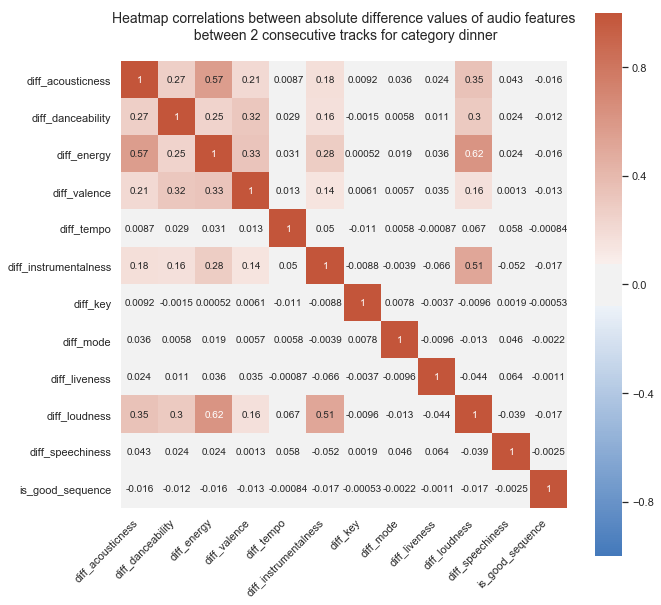

In [141]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [142]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.005989
         Iterations 13


## Summary Logit

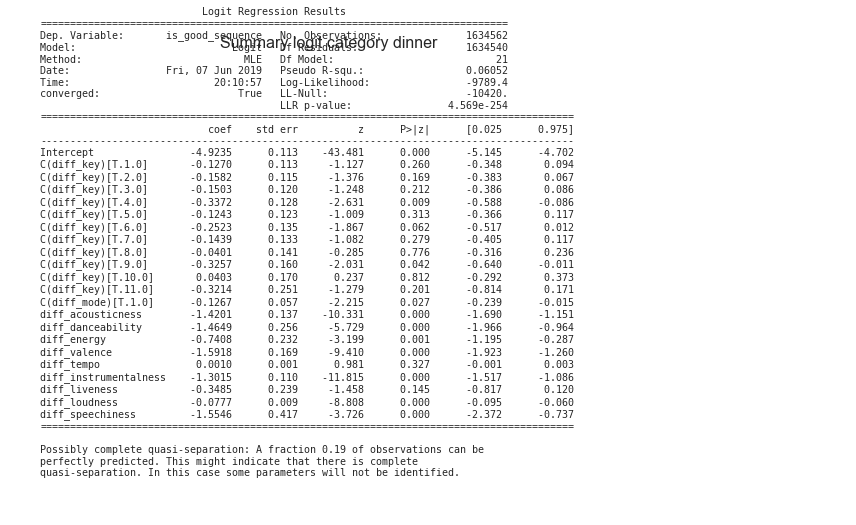

In [143]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

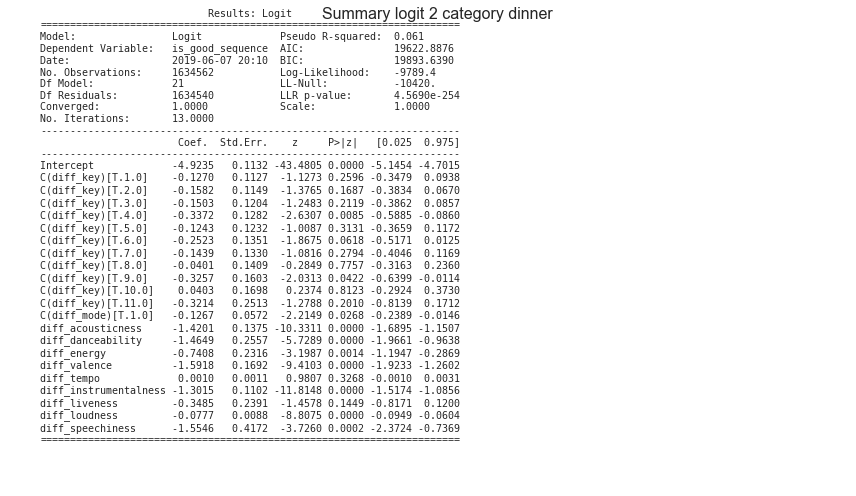

In [144]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [145]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.007274  0.000000e+00  0.005826  0.009081         True
C(key)[T.1.0]     0.880704  2.596330e-01  0.706165  1.098384        False
C(key)[T.2.0]     0.853699  1.686715e-01  0.681538  1.069349        False
C(key)[T.3.0]     0.860475  2.119147e-01  0.679628  1.089444        False
C(key)[T.4.0]     0.713753  8.520443e-03  0.555184  0.917612         True
C(key)[T.5.0]     0.883107  3.131332e-01  0.693603  1.124387        False
C(key)[T.6.0]     0.777027  6.183855e-02  0.596271  1.012576        False
C(key)[T.7.0]     0.865984  2.794448e-01  0.667219  1.123961        False
C(key)[T.8.0]     0.960655  7.757126e-01  0.728864  1.266161        False
C(key)[T.9.0]     0.722046  4.222275e-02  0.527348  0.988626         True
C(key)[T.10.0]    1.041127  8.123265e-01  0.746464  1.452108        False
C(key)[T.11.0]    0.725162  2.009726e-01  0.443126  1.186705        False
C(mode)[T.1.0]    0.880967  2.676965e-02  0.787505  0.985521         True
acousticness      0.241689  5.097628e-25  0.184608  0.316419         True
danceability      0.231093  1.010836e-08  0.139999  0.381458         True
energy            0.476749  1.380540e-03  0.302806  0.750610         True
valence           0.203567  4.947475e-21  0.146125  0.283589         True
tempo             1.001049  3.267623e-01  0.998954  1.003148        False
instrumentalness  0.272117  3.272358e-32  0.219274  0.337695         True
liveness          0.705737  1.448832e-01  0.441727  1.127538        False
loudness          0.925279  1.279382e-18  0.909426  0.941409         True
speechiness       0.211272  1.945041e-04  0.093260  0.478615         True

# Category Dutch:

## Loading data

In [146]:
file = "df_diff_category_dutch_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [147]:
category = file.split('.')[-2].split('_')[-2]
category

'dutch'

## Eliminating duplicates in case they exist

In [148]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506256 entries, 0 to 3506255
Data columns (total 13 columns):
current_track-next_track    3506256 non-null object
diff_acousticness           3506256 non-null float64
diff_danceability           3506256 non-null float64
diff_energy                 3506256 non-null float64
diff_valence                3506256 non-null float64
diff_tempo                  3506256 non-null float64
diff_instrumentalness       3506256 non-null float64
diff_key                    3506256 non-null float64
diff_mode                   3506256 non-null float64
diff_liveness               3506256 non-null float64
diff_loudness               3506256 non-null float64
diff_speechiness            3506256 non-null float64
is_good_sequence            3506256 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 347.8+ MB


In [149]:
# check for duplicates

len(df['current_track-next_track'].unique())

3506256

In [150]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    3504384
1       1872
Name: is_good_sequence, dtype: int64

In [151]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [152]:
df['is_good_sequence'].value_counts()

0    3504384
1       1872
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [153]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       3.506256e+06       3.506256e+06  3.506256e+06  3.506256e+06   
mean        3.137140e-01       1.776752e-01  2.399795e-01  2.929572e-01   
std         2.546060e-01       1.306390e-01  1.770115e-01  2.078030e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         9.458900e-02       7.200000e-02  9.600000e-02  1.190000e-01   
50%         2.508480e-01       1.530000e-01  2.050000e-01  2.560000e-01   
75%         4.920000e-01       2.580000e-01  3.500000e-01  4.360000e-01   
max         9.869661e-01       8.010000e-01  9.532000e-01  9.570000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  3.506256e+06           3.506256e+06  3.506256e+06  3.506256e+06   
mean   3.396758e+01           4.608723e-02  4.054684e+00  4.105918e-01   
std    2.563629e+01           1.461820e-01  2.908657e+00  4.919413e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.322100e+01           3.870000e-06  2.000000e+00  0.000000e+00   
50%    2.894300e+01           1.300000e-04  4.000000e+00  0.000000e+00   
75%    4.904700e+01           5.397000e-03  6.000000e+00  1.000000e+00   
max    1.648500e+02           9.610000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   3.506256e+06   3.506256e+06      3.506256e+06      3.506256e+06  
mean    1.696790e-01   3.539489e+00      4.923275e-02      5.339028e-04  
std     2.038594e-01   2.945081e+00      8.051547e-02      2.310017e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     3.100000e-02   1.290000e+00      5.800000e-03      0.000000e+00  
50%     8.730000e-02   2.797000e+00      1.590000e-02      0.000000e+00  
75%     2.220000e-01   5.023000e+00      5.010000e-02      0.000000e+00  
max     9.776000e-01   2.758000e+01      8.545000e-01      1.000000e+00

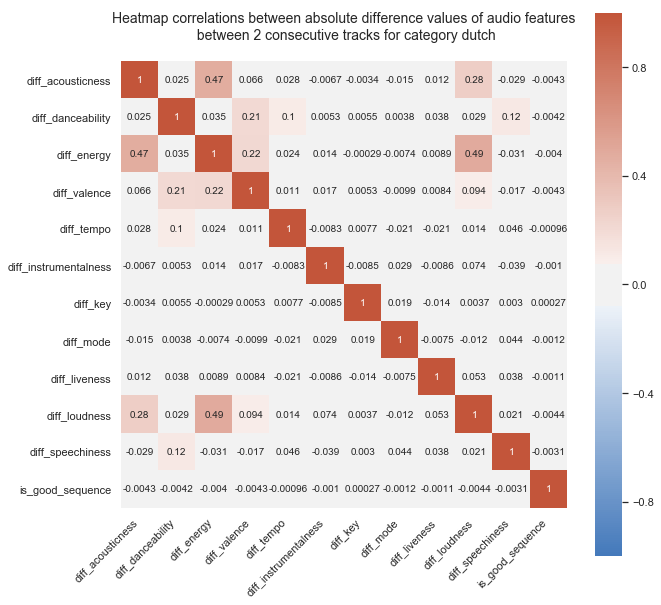

In [154]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [155]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.004519
         Iterations 12


## Summary Logit

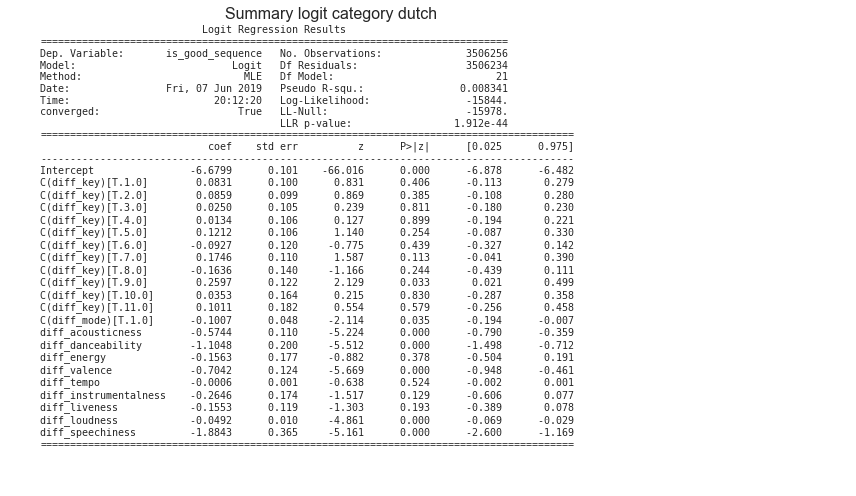

In [156]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

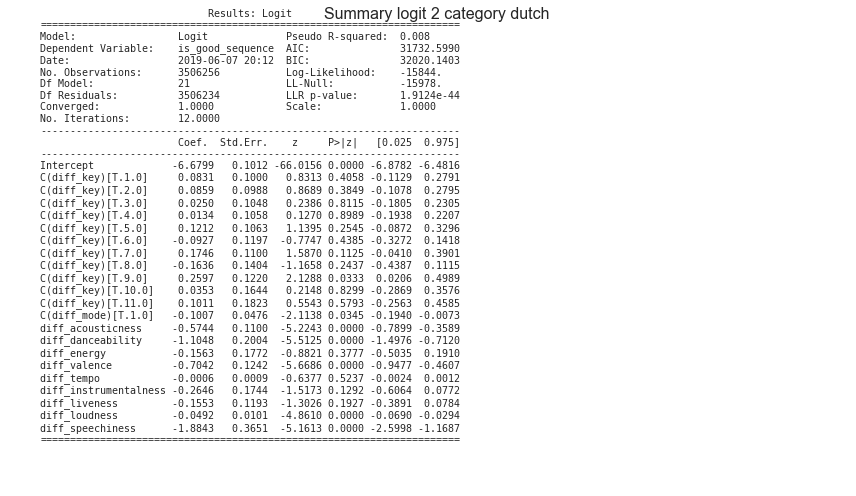

In [157]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [158]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.001256  0.000000e+00  0.001030  0.001531         True
C(key)[T.1.0]     1.086688  4.057809e-01  0.893273  1.321982        False
C(key)[T.2.0]     1.089650  3.849022e-01  0.897799  1.322496        False
C(key)[T.3.0]     1.025323  8.114540e-01  0.834889  1.259192        False
C(key)[T.4.0]     1.013526  8.989015e-01  0.823794  1.246956        False
C(key)[T.5.0]     1.128823  2.544933e-01  0.916450  1.390409        False
C(key)[T.6.0]     0.911478  4.385432e-01  0.720941  1.152372        False
C(key)[T.7.0]     1.190714  1.125215e-01  0.959803  1.477178        False
C(key)[T.8.0]     0.849051  2.436762e-01  0.644854  1.117909        False
C(key)[T.9.0]     1.296588  3.326787e-02  1.020817  1.646856         True
C(key)[T.10.0]    1.035954  8.298982e-01  0.750560  1.429867        False
C(key)[T.11.0]    1.106364  5.793440e-01  0.773908  1.581638        False
C(mode)[T.1.0]    0.904224  3.452936e-02  0.823634  0.992698         True
acousticness      0.563024  1.747711e-07  0.453873  0.698424         True
danceability      0.331269  3.538142e-08  0.223656  0.490660         True
energy            0.855319  3.777354e-01  0.604391  1.210427        False
valence           0.494483  1.439300e-08  0.387617  0.630812         True
tempo             0.999412  5.236882e-01  0.997606  1.001221        False
instrumentalness  0.767525  1.291879e-01  0.545334  1.080245        False
liveness          0.856121  1.927184e-01  0.677677  1.081554        False
loudness          0.951995  1.167732e-06  0.933298  0.971067         True
speechiness       0.151941  2.452409e-07  0.074289  0.310762         True

# Category Focus:

## Loading data

In [159]:
file = "df_diff_category_focus_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [160]:
category = file.split('.')[-2].split('_')[-2]
category

'focus'

## Eliminating duplicates in case they exist

In [161]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216822 entries, 0 to 8216821
Data columns (total 13 columns):
current_track-next_track    8216822 non-null object
diff_acousticness           8216822 non-null float64
diff_danceability           8216822 non-null float64
diff_energy                 8216822 non-null float64
diff_valence                8216822 non-null float64
diff_tempo                  8216822 non-null float64
diff_instrumentalness       8216822 non-null float64
diff_key                    8216822 non-null float64
diff_mode                   8216822 non-null float64
diff_liveness               8216822 non-null float64
diff_loudness               8216822 non-null float64
diff_speechiness            8216822 non-null float64
is_good_sequence            8216822 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 815.0+ MB


In [162]:
# check for duplicates

len(df['current_track-next_track'].unique())

8216822

In [163]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    8213956
1       2866
Name: is_good_sequence, dtype: int64

In [164]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [165]:
df['is_good_sequence'].value_counts()

0    8213956
1       2866
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [166]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       8.216822e+06       8.216822e+06  8.216822e+06  8.216822e+06   
mean        3.584850e-01       2.398206e-01  2.564169e-01  2.053243e-01   
std         3.385085e-01       1.731269e-01  2.157556e-01  1.902546e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         5.100000e-02       9.900000e-02  7.930000e-02  5.600000e-02   
50%         2.275000e-01       2.080000e-01  1.990000e-01  1.460000e-01   
75%         6.710000e-01       3.500000e-01  3.890000e-01  3.007000e-01   
max         9.960000e-01       9.470000e-01  1.000000e+00  9.660000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  8.216822e+06           8.216822e+06  8.216822e+06  8.216822e+06   
mean   4.233610e+01           2.270054e-01  4.050237e+00  4.836571e-01   
std    3.381134e+01           2.915722e-01  2.911650e+00  4.997329e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.525800e+01           3.300000e-02  2.000000e+00  0.000000e+00   
50%    3.539600e+01           8.300000e-02  4.000000e+00  0.000000e+00   
75%    6.051100e+01           2.890000e-01  6.000000e+00  1.000000e+00   
max    2.199250e+02           1.000000e+00  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   8.216822e+06   8.216822e+06      8.216822e+06      8.216822e+06  
mean    9.375530e-02   1.001114e+01      4.420481e-02      3.487967e-04  
std     1.567373e-01   8.645486e+00      8.406270e-02      1.867284e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     1.230000e-02   3.645000e+00      6.000000e-03      0.000000e+00  
50%     3.030000e-02   7.894000e+00      1.460000e-02      0.000000e+00  
75%     9.200000e-02   1.375100e+01      3.860000e-02      0.000000e+00  
max     9.830000e-01   5.671500e+01      8.620000e-01      1.000000e+00

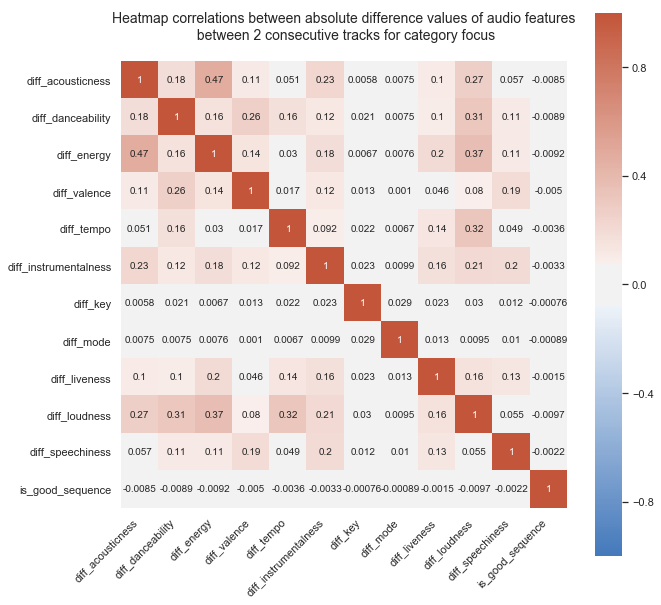

In [167]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [168]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.003005
         Iterations 13


## Summary Logit

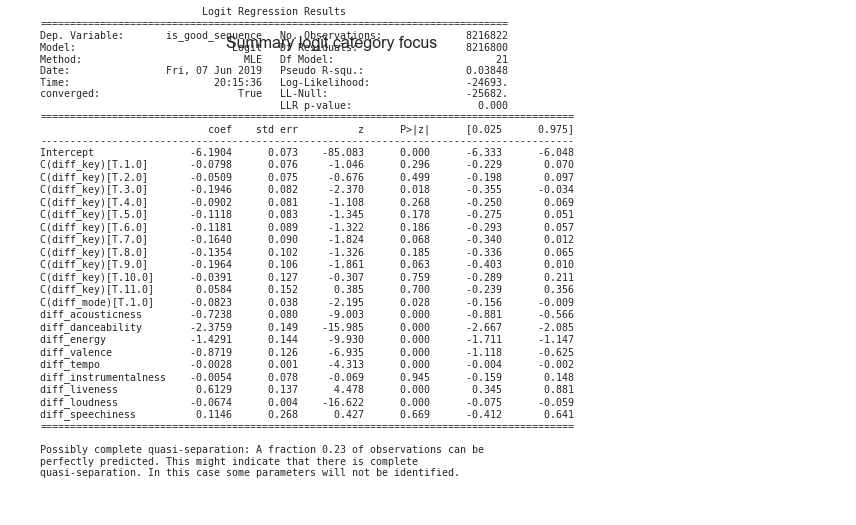

In [169]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

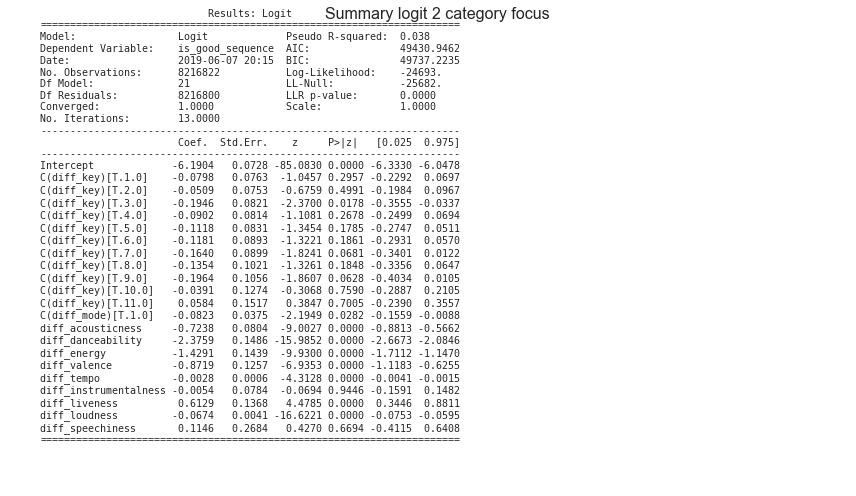

In [170]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [171]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.002049  0.000000e+00  0.001777  0.002363         True
C(key)[T.1.0]     0.923342  2.956887e-01  0.795139  1.072216        False
C(key)[T.2.0]     0.950393  4.990905e-01  0.820029  1.101481        False
C(key)[T.3.0]     0.823187  1.778915e-02  0.700835  0.966899         True
C(key)[T.4.0]     0.913709  2.678060e-01  0.778913  1.071834        False
C(key)[T.5.0]     0.894225  1.784893e-01  0.759830  1.052392        False
C(key)[T.6.0]     0.888651  1.861337e-01  0.745980  1.058608        False
C(key)[T.7.0]     0.848768  6.813038e-02  0.711666  1.012283        False
C(key)[T.8.0]     0.873324  1.848080e-01  0.714879  1.066886        False
C(key)[T.9.0]     0.821646  6.279032e-02  0.668062  1.010538        False
C(key)[T.10.0]    0.961682  7.590045e-01  0.749247  1.234348        False
C(key)[T.11.0]    1.060099  7.004673e-01  0.787423  1.427199        False
C(mode)[T.1.0]    0.920955  2.817324e-02  0.855665  0.991226         True
acousticness      0.484928  2.201353e-19  0.414235  0.567685         True
danceability      0.092927  1.620691e-57  0.069442  0.124354         True
energy            0.239525  3.083314e-23  0.180654  0.317580         True
valence           0.418172  4.053381e-12  0.326849  0.535010         True
tempo             0.997207  1.611867e-05  0.995940  0.998475         True
instrumentalness  0.994570  9.446451e-01  0.852880  1.159799        False
liveness          1.845706  7.517963e-06  1.411493  2.413493         True
loudness          0.934820  4.823081e-62  0.927420  0.942279         True
speechiness       1.121443  6.694062e-01  0.662637  1.897926        False

# Category Funk:

## Loading data

In [172]:
file = "df_diff_category_funk_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [173]:
category = file.split('.')[-2].split('_')[-2]
category

'funk'

## Eliminating duplicates in case they exist

In [174]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708122 entries, 0 to 708121
Data columns (total 13 columns):
current_track-next_track    708122 non-null object
diff_acousticness           708122 non-null float64
diff_danceability           708122 non-null float64
diff_energy                 708122 non-null float64
diff_valence                708122 non-null float64
diff_tempo                  708122 non-null float64
diff_instrumentalness       708122 non-null float64
diff_key                    708122 non-null float64
diff_mode                   708122 non-null float64
diff_liveness               708122 non-null float64
diff_loudness               708122 non-null float64
diff_speechiness            708122 non-null float64
is_good_sequence            708122 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 70.2+ MB


In [175]:
# check for duplicates

len(df['current_track-next_track'].unique())

708122

In [176]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    707281
1       841
Name: is_good_sequence, dtype: int64

In [177]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [178]:
df['is_good_sequence'].value_counts()

0    707281
1       841
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [179]:
df.describe()

diff_acousticness  diff_danceability    diff_energy   diff_valence  \
count      708122.000000      708122.000000  708122.000000  708122.000000   
mean            0.196792           0.131246       0.169389       0.181494   
std             0.187132           0.101946       0.133306       0.152904   
min             0.000000           0.000000       0.000000       0.000000   
25%             0.050100           0.051000       0.065000       0.063000   
50%             0.136600           0.109000       0.139000       0.141000   
75%             0.288000           0.188000       0.243000       0.261000   
max             0.963958           0.626000       0.856000       0.913500   

          diff_tempo  diff_instrumentalness       diff_key      diff_mode  \
count  708122.000000          708122.000000  708122.000000  708122.000000   
mean       21.460573               0.316199       4.319442       0.491737   
std        20.476699               0.346951       3.113147       0.499932   
min         0.000000               0.000000       0.000000       0.000000   
25%         6.994000               0.006139       2.000000       0.000000   
50%        15.166000               0.115000       4.000000       0.000000   
75%        28.297000               0.711000       7.000000       1.000000   
max       136.671000               0.969000      11.000000       1.000000   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count  708122.000000  708122.000000     708122.000000     708122.000000  
mean        0.143196       3.567851          0.044533          0.001188  
std         0.151446       2.883704          0.055100          0.034442  
min         0.000000       0.000000          0.000000          0.000000  
25%         0.034900       1.327000          0.010400          0.000000  
50%         0.089800       2.869000          0.025200          0.000000  
75%         0.210000       5.119000          0.054700          0.000000  
max         0.975500      19.785000          0.415200          1.000000

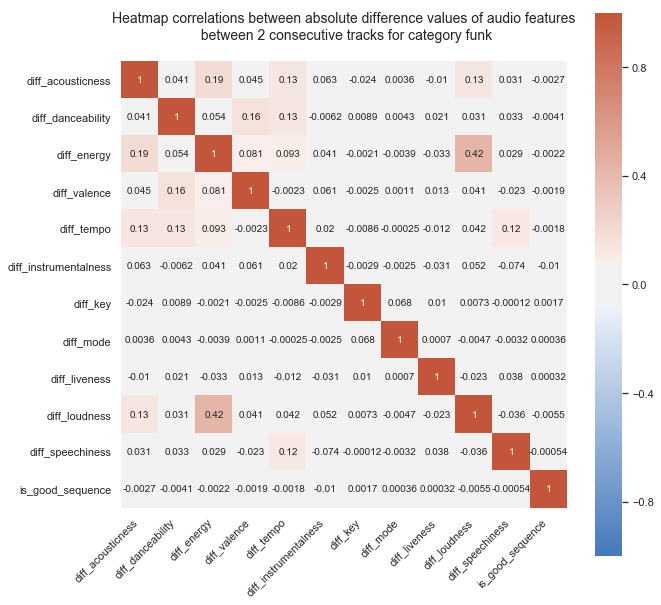

In [180]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [181]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.009100
         Iterations 11


## Summary Logit

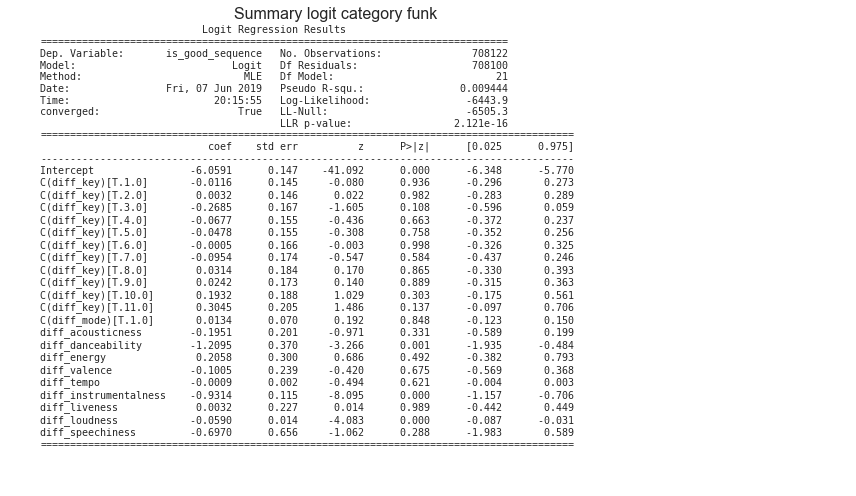

In [182]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

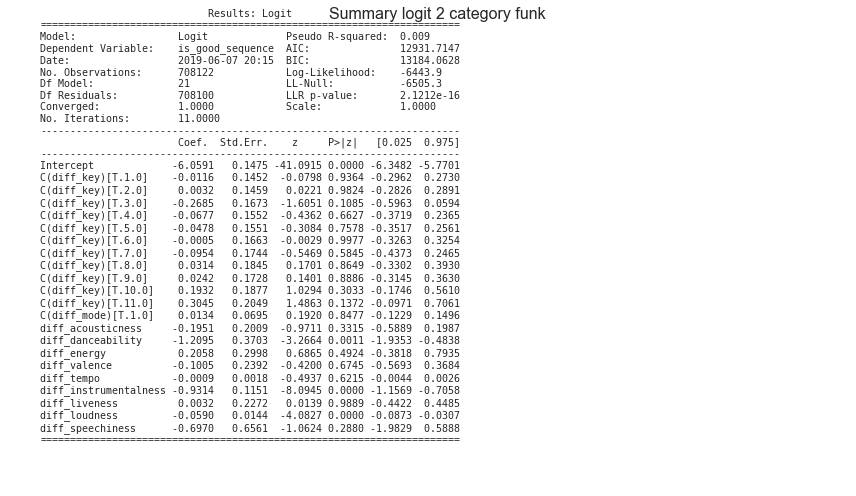

In [183]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [184]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.002336  0.000000e+00  0.001750  0.003119         True
C(key)[T.1.0]     0.988473  9.363657e-01  0.743633  1.313926        False
C(key)[T.2.0]     1.003231  9.823537e-01  0.753793  1.335212        False
C(key)[T.3.0]     0.764546  1.084675e-01  0.550848  1.061148        False
C(key)[T.4.0]     0.934534  6.626733e-01  0.689410  1.266812        False
C(key)[T.5.0]     0.953302  7.577578e-01  0.703471  1.291858        False
C(key)[T.6.0]     0.999520  9.976948e-01  0.721560  1.384556        False
C(key)[T.7.0]     0.909014  5.844676e-01  0.645786  1.279536        False
C(key)[T.8.0]     1.031887  8.649054e-01  0.718767  1.481413        False
C(key)[T.9.0]     1.024514  8.885590e-01  0.730134  1.437585        False
C(key)[T.10.0]    1.213106  3.032818e-01  0.839769  1.752419        False
C(key)[T.11.0]    1.355979  1.372117e-01  0.907502  2.026090        False
C(mode)[T.1.0]    1.013443  8.477247e-01  0.884314  1.161427        False
acousticness      0.822734  3.314978e-01  0.554917  1.219805        False
danceability      0.298335  1.089243e-03  0.144380  0.616456         True
energy            1.228527  4.924261e-01  0.682612  2.211035        False
valence           0.904422  6.745170e-01  0.565916  1.445408        False
tempo             0.999111  6.214880e-01  0.995591  1.002644        False
instrumentalness  0.394020  5.747753e-16  0.314471  0.493693         True
liveness          1.003161  9.889193e-01  0.642604  1.566021        False
loudness          0.942739  4.452150e-05  0.916427  0.969807         True
speechiness       0.498063  2.880317e-01  0.137672  1.801865        False

# Category Gaming:

## Loading data

In [185]:
file = "df_diff_category_gaming_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [186]:
category = file.split('.')[-2].split('_')[-2]
category

'gaming'

## Eliminating duplicates in case they exist

In [187]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897756 entries, 0 to 897755
Data columns (total 13 columns):
current_track-next_track    897756 non-null object
diff_acousticness           897756 non-null float64
diff_danceability           897756 non-null float64
diff_energy                 897756 non-null float64
diff_valence                897756 non-null float64
diff_tempo                  897756 non-null float64
diff_instrumentalness       897756 non-null float64
diff_key                    897756 non-null float64
diff_mode                   897756 non-null float64
diff_liveness               897756 non-null float64
diff_loudness               897756 non-null float64
diff_speechiness            897756 non-null float64
is_good_sequence            897756 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 89.0+ MB


In [188]:
# check for duplicates

len(df['current_track-next_track'].unique())

897756

In [189]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    896809
1       947
Name: is_good_sequence, dtype: int64

In [190]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [191]:
df['is_good_sequence'].value_counts()

0    896809
1       947
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [192]:
df.describe()

diff_acousticness  diff_danceability    diff_energy   diff_valence  \
count      897756.000000      897756.000000  897756.000000  897756.000000   
mean            0.184432           0.188160       0.222015       0.281790   
std             0.245793           0.142379       0.186826       0.206429   
min             0.000000           0.000000       0.000000       0.000000   
25%             0.009338           0.074000       0.071000       0.111000   
50%             0.063240           0.158000       0.172000       0.241000   
75%             0.268545           0.274000       0.330000       0.418000   
max             0.973999           0.870900       0.968100       0.962000   

          diff_tempo  diff_instrumentalness       diff_key      diff_mode  \
count  897756.000000          897756.000000  897756.000000  897756.000000   
mean       33.192247               0.308547       4.148902       0.486624   
std        24.355558               0.353440       2.989020       0.499821   
min         0.000000               0.000000       0.000000       0.000000   
25%        13.539000               0.002056       2.000000       0.000000   
50%        28.592000               0.096170       4.000000       0.000000   
75%        48.220000               0.692000       6.000000       1.000000   
max       143.742000               0.985000      11.000000       1.000000   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count  897756.000000  897756.000000     897756.000000     897756.000000  
mean        0.163432       3.767713          0.082736          0.001055  
std         0.162565       3.514083          0.102720          0.032461  
min         0.000000       0.000000          0.000000          0.000000  
25%         0.039200       1.237000          0.015200          0.000000  
50%         0.110000       2.774000          0.044000          0.000000  
75%         0.241200       5.288000          0.102500          0.000000  
max         0.962000      29.977000          0.637800          1.000000

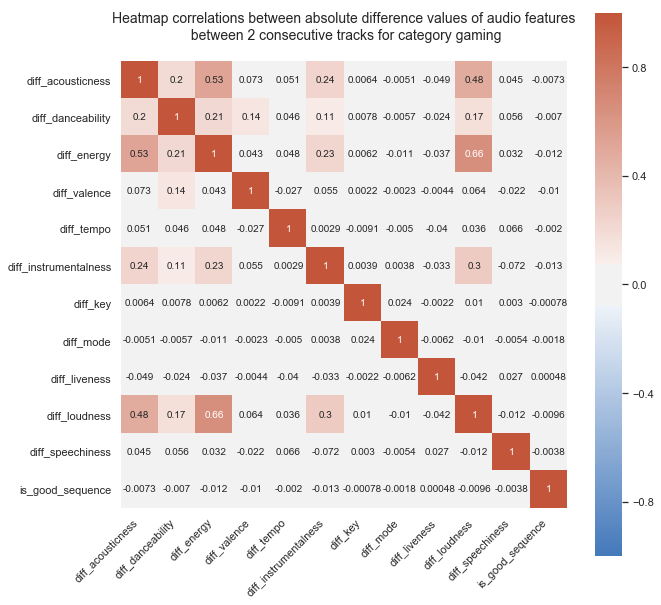

In [193]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [194]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.008069
         Iterations 12


## Summary Logit

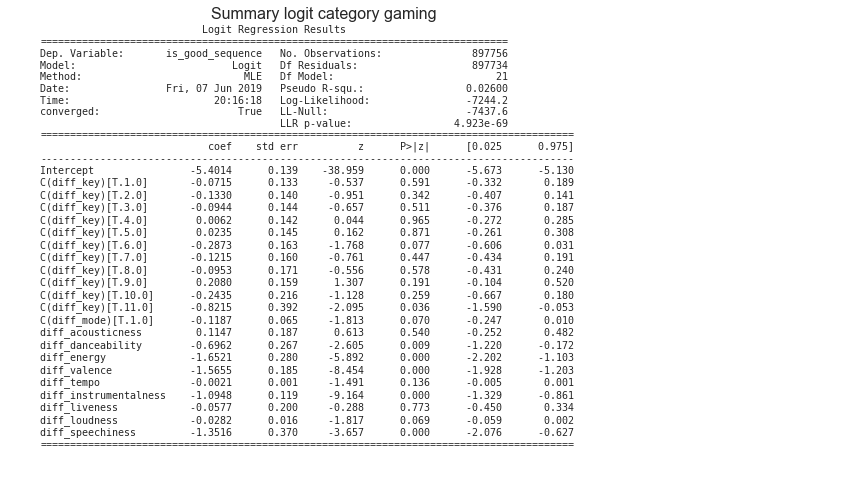

In [195]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

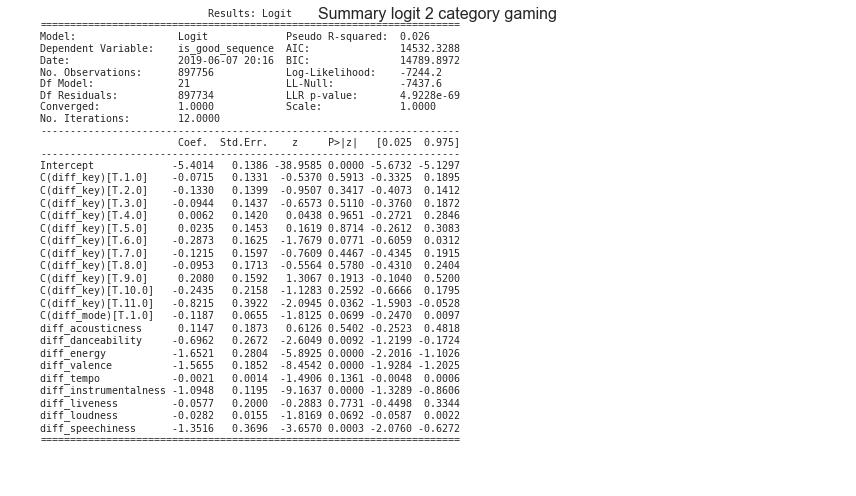

In [196]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [197]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.004510  0.000000e+00  0.003437  0.005918         True
C(key)[T.1.0]     0.930999  5.912719e-01  0.717161  1.208597        False
C(key)[T.2.0]     0.875438  3.417344e-01  0.665461  1.151670        False
C(key)[T.3.0]     0.909890  5.110054e-01  0.686586  1.205820        False
C(key)[T.4.0]     1.006237  9.650840e-01  0.761741  1.329208        False
C(key)[T.5.0]     1.023801  8.713727e-01  0.770121  1.361043        False
C(key)[T.6.0]     0.750254  7.707009e-02  0.545586  1.031701        False
C(key)[T.7.0]     0.885584  4.466991e-01  0.647601  1.211023        False
C(key)[T.8.0]     0.909113  5.779583e-01  0.649888  1.271737        False
C(key)[T.9.0]     1.231217  1.913073e-01  0.901241  1.682011        False
C(key)[T.10.0]    0.783844  2.591823e-01  0.513453  1.196627        False
C(key)[T.11.0]    0.439761  3.621111e-02  0.203872  0.948582         True
C(mode)[T.1.0]    0.888093  6.990805e-02  0.781130  1.009702        False
acousticness      1.121559  5.401510e-01  0.776992  1.618929        False
danceability      0.498500  9.190107e-03  0.295246  0.841679         True
energy            0.191646  3.804967e-09  0.110623  0.332015         True
valence           0.208989  2.809935e-17  0.145380  0.300428         True
tempo             0.997946  1.360761e-01  0.995252  1.000648        False
instrumentalness  0.334618  5.014414e-20  0.264764  0.422902         True
liveness          0.943958  7.731152e-01  0.637782  1.397116        False
loudness          0.972172  6.922984e-02  0.943021  1.002224        False
speechiness       0.258821  2.551641e-04  0.125430  0.534072         True

# Category Hiphop:

## Loading data

In [198]:
file = "df_diff_category_hiphop_2019-06-05.csv"

df = pd.read_csv(input_folder+file)

In [199]:
category = file.split('.')[-2].split('_')[-2]
category

'hiphop'

## Eliminating duplicates in case they exist

In [200]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865220 entries, 0 to 7865219
Data columns (total 13 columns):
current_track-next_track    7865220 non-null object
diff_acousticness           7865220 non-null float64
diff_danceability           7865220 non-null float64
diff_energy                 7865220 non-null float64
diff_valence                7865220 non-null float64
diff_tempo                  7865220 non-null float64
diff_instrumentalness       7865220 non-null float64
diff_key                    7865220 non-null float64
diff_mode                   7865220 non-null float64
diff_liveness               7865220 non-null float64
diff_loudness               7865220 non-null float64
diff_speechiness            7865220 non-null float64
is_good_sequence            7865220 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 780.1+ MB


In [201]:
# check for duplicates

len(df['current_track-next_track'].unique())

7865220

In [202]:
# how many labeled as 'good sequence'
df['is_good_sequence'].value_counts()

0    7862416
1       2804
Name: is_good_sequence, dtype: int64

In [203]:
# eliminate duplicates

# Organize dataframe with is_good_sequence = 1 on top

df.sort_values(by='is_good_sequence', ascending=False, inplace = True)

# Eliminate duplicates of 'current_track-next_track' using keep = 'first', so is_good_sequence = 1 should be kept when duplicates exists

df.drop_duplicates(subset=['current_track-next_track','is_good_sequence'], keep='first', inplace=True)

In [204]:
df['is_good_sequence'].value_counts()

0    7862416
1       2804
Name: is_good_sequence, dtype: int64

## Checking descriptive statistics and correlation of absolute difference of audio features 

In [205]:
df.describe()

diff_acousticness  diff_danceability   diff_energy  diff_valence  \
count       7.865220e+06       7.865220e+06  7.865220e+06  7.865220e+06   
mean        2.466444e-01       1.464891e-01  1.867662e-01  2.534891e-01   
std         2.243041e-01       1.119953e-01  1.462900e-01  1.819564e-01   
min         0.000000e+00       0.000000e+00  0.000000e+00  0.000000e+00   
25%         6.570000e-02       5.700000e-02  7.200000e-02  1.040000e-01   
50%         1.753000e-01       1.230000e-01  1.540000e-01  2.200000e-01   
75%         3.720000e-01       2.120000e-01  2.670000e-01  3.720000e-01   
max         9.859831e-01       9.810000e-01  9.689000e-01  9.720000e-01   

         diff_tempo  diff_instrumentalness      diff_key     diff_mode  \
count  7.865220e+06           7.865220e+06  7.865220e+06  7.865220e+06   
mean   3.512362e+01           1.343774e-01  4.266060e+00  5.001386e-01   
std    2.599141e+01           2.935252e-01  3.098050e+00  5.000000e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.297200e+01           0.000000e+00  1.000000e+00  0.000000e+00   
50%    3.098900e+01           4.020000e-05  4.000000e+00  1.000000e+00   
75%    5.267900e+01           1.300000e-02  7.000000e+00  1.000000e+00   
max    2.161150e+02           9.730000e-01  1.100000e+01  1.000000e+00   

       diff_liveness  diff_loudness  diff_speechiness  is_good_sequence  
count   7.865220e+06   7.865220e+06      7.865220e+06      7.865220e+06  
mean    1.298723e-01   3.215648e+00      1.568090e-01      3.565062e-04  
std     1.489016e-01   2.823347e+00      1.209702e-01      1.887801e-02  
min     0.000000e+00   0.000000e+00      0.000000e+00      0.000000e+00  
25%     2.600000e-02   1.138000e+00      5.900000e-02      0.000000e+00  
50%     7.000000e-02   2.463000e+00      1.350000e-01      0.000000e+00  
75%     1.903000e-01   4.456000e+00      2.290000e-01      0.000000e+00  
max     9.284000e-01   2.360100e+01      9.170000e-01      1.000000e+00

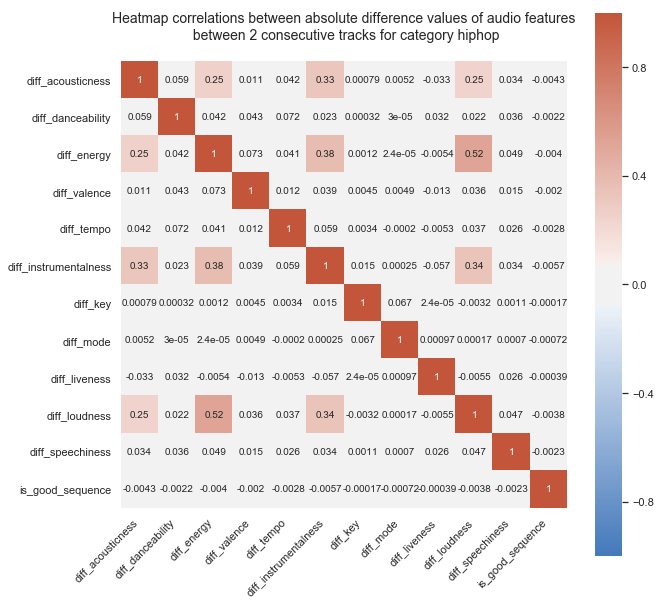

In [206]:
plt.figure(figsize=(10,10))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between absolute difference values of audio features" 
             +"\n between 2 consecutive tracks for category "+category+"\n", fontsize = 14);

## Applying logit

In [207]:
import patsy
import statsmodels.api as sm

endog, exog = patsy.dmatrices('is_good_sequence ~ diff_acousticness + diff_danceability + diff_energy + diff_valence +'+
                              'diff_tempo + diff_instrumentalness + diff_liveness+ diff_loudness + diff_speechiness +'+
                              ' C(diff_key) + C(diff_mode)',
                              data = df, return_type = 'matrix')

model=sm.Logit(endog,exog)
res=model.fit()


Optimization terminated successfully.
         Current function value: 0.003149
         Iterations 13


## Summary Logit

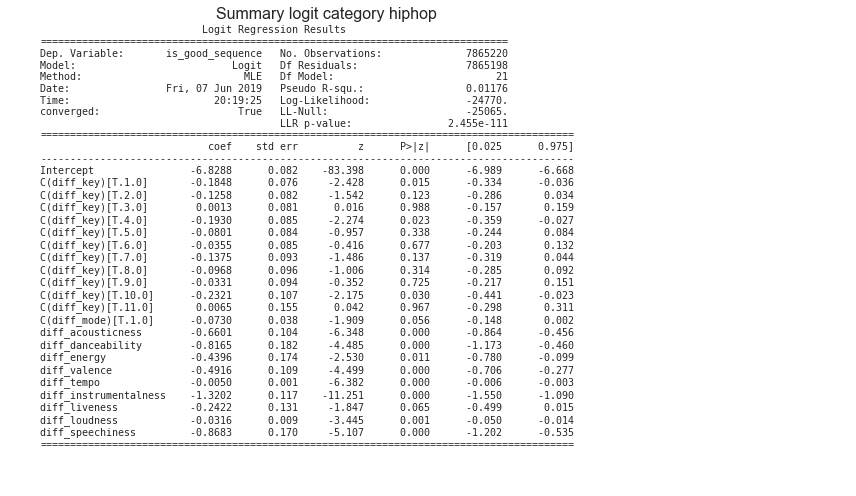

In [208]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit category '+category, {'fontsize': 16, 'horizontalalignment': 'right'})
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary_'+category+"_"+TodaysDate+'.png')

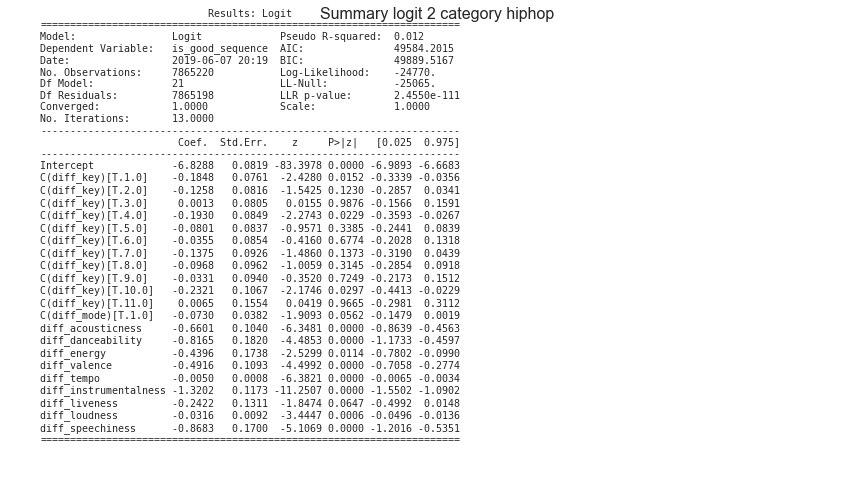

In [209]:
plt.rc('figure', figsize=(12, 7))
plt.title('Summary logit 2 category '+category+"\n\n\n\n\n\n\n\n", {'fontsize': 16, 'horizontalalignment': 'center'})
plt.text(0.01, 0.05, str(res.summary2()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig(images_folder+'logit_summary2_'+category+"_"+TodaysDate+'.png')

## Odds Ratios

In [210]:
# GETTING THE ODDS RATIOS, P-VALUE, AND 95% CI
res_odds = pd.DataFrame(np.exp(res.params), columns= ['OR'])
res_odds['p-value']= res.pvalues
res_odds[['2.5%', '97.5%']] = pd.DataFrame(np.exp(res.conf_int()))
res_odds['significant'] = res_odds['p-value'] < 0.05
res_odds.index = ['Intercept', 'C(key)[T.1.0]','C(key)[T.2.0]','C(key)[T.3.0]','C(key)[T.4.0]','C(key)[T.5.0]',
                        'C(key)[T.6.0]', 'C(key)[T.7.0]','C(key)[T.8.0]','C(key)[T.9.0]','C(key)[T.10.0]','C(key)[T.11.0]',
                       'C(mode)[T.1.0]', 'acousticness', 'danceability', 'energy', 'valence','tempo', 'instrumentalness', 
                        'liveness', 'loudness','speechiness']

res_odds

OR       p-value      2.5%     97.5%  significant
Intercept         0.001082  0.000000e+00  0.000922  0.001271         True
C(key)[T.1.0]     0.831292  1.518246e-02  0.716103  0.965009         True
C(key)[T.2.0]     0.881771  1.229589e-01  0.751488  1.034642        False
C(key)[T.3.0]     1.001253  9.875948e-01  0.855085  1.172406        False
C(key)[T.4.0]     0.824479  2.294872e-02  0.698142  0.973678         True
C(key)[T.5.0]     0.923042  3.384972e-01  0.783437  1.087524        False
C(key)[T.6.0]     0.965112  6.774419e-01  0.816412  1.140897        False
C(key)[T.7.0]     0.871493  1.372663e-01  0.726905  1.044841        False
C(key)[T.8.0]     0.907736  3.144670e-01  0.751699  1.096162        False
C(key)[T.9.0]     0.967454  7.248712e-01  0.804653  1.163193        False
C(key)[T.10.0]    0.792860  2.966146e-02  0.643193  0.977353         True
C(key)[T.11.0]    1.006542  9.665407e-01  0.742193  1.365044        False
C(mode)[T.1.0]    0.929602  5.622224e-02  0.862488  1.001939        False
acousticness      0.516813  2.179845e-10  0.421528  0.633638         True
danceability      0.441987  7.281812e-06  0.309358  0.631477         True
energy            0.644298  1.141075e-02  0.458333  0.905719         True
valence           0.611648  6.822022e-06  0.493737  0.757718         True
tempo             0.995042  1.746786e-10  0.993524  0.996562         True
instrumentalness  0.267087  2.298183e-29  0.212213  0.336151         True
liveness          0.784900  6.468752e-02  0.607044  1.014865        False
loudness          0.968876  5.717031e-04  0.951601  0.986464         True
speechiness       0.419655  3.275563e-07  0.300720  0.585629         True